In [ ]:
import pandas as pd
import numpy as np
import os


def load_horizontal_depth(filename):
    try:
        df = pd.read_csv(filename)

        df_transposed = df.transpose()
        df_transposed.columns = ['depth']

        df_transposed['depth'] = pd.to_numeric(df_transposed['depth'], errors='coerce')
        df_clean = df_transposed.dropna()
        df_clean['depth'] = df_clean['depth'].astype(int)
        return df_clean
    except FileNotFoundError:
        print(f"ERRORE: Non trovo il file '{filename}'.")
        return pd.DataFrame()

f_bp = "gene_go_matrix_propT_rel-is_a-part_of_ont-BP.csv"
f_cc = "gene_go_matrix_propT_rel-is_a-part_of_ont-CC.csv"
f_mf = "gene_go_matrix_propT_rel-is_a-part_of_ont-MF.csv"
f_hpo = "gene_hpo_matrix_binary_withAncestors_namespace_Phenotypic abnormality.csv"

f_depth_bp = "goterm_depth_propT_rel-is_a-part_of_ont-BP.csv"
f_depth_cc = "goterm_depth_propT_rel-is_a-part_of_ont-CC.csv"
f_depth_mf = "goterm_depth_propT_rel-is_a-part_of_ont-MF.csv"

print("--- Caricamento Matrici ---")

print(f"Leggo BP: {f_bp}")
bp = pd.read_csv(f_bp, index_col=0)

print(f"Leggo CC: {f_cc}")
cc = pd.read_csv(f_cc, index_col=0)

print(f"Leggo MF: {f_mf}")
mf = pd.read_csv(f_mf, index_col=0)

print(f"Leggo HPO: {f_hpo}")
hpo = pd.read_csv(f_hpo, index_col=0)

print("\n--- Caricamento Profondità (Depth) ---")

print(f"Leggo Depth BP: {f_depth_bp}")
depth_bp = load_horizontal_depth(f_depth_bp)

print(f"Leggo Depth CC: {f_depth_cc}")
depth_cc = load_horizontal_depth(f_depth_cc)

print(f"Leggo Depth MF: {f_depth_mf}")
depth_mf = load_horizontal_depth(f_depth_mf)

print("\n--- RIEPILOGO DATI ---")
print(f"BP Shape : {bp.shape}")
print(f"CC Shape : {cc.shape}")
print(f"MF Shape : {mf.shape}")
print(f"HPO Shape: {hpo.shape}")
print(f"Depth BP : {len(depth_bp)} termini")
print(f"Depth CC : {len(depth_cc)} termini")
print(f"Depth MF : {len(depth_mf)} termini")

print("\nCaricamento completato con successo!")

--- Caricamento Matrici ---
Leggo BP: gene_go_matrix_propT_rel-is_a-part_of_ont-BP.csv
Leggo CC: gene_go_matrix_propT_rel-is_a-part_of_ont-CC.csv
Leggo MF: gene_go_matrix_propT_rel-is_a-part_of_ont-MF.csv
Leggo HPO: gene_hpo_matrix_binary_withAncestors_namespace_Phenotypic abnormality.csv

--- Caricamento Profondità (Depth) ---
Leggo Depth BP: goterm_depth_propT_rel-is_a-part_of_ont-BP.csv
Leggo Depth CC: goterm_depth_propT_rel-is_a-part_of_ont-CC.csv
Leggo Depth MF: goterm_depth_propT_rel-is_a-part_of_ont-MF.csv

--- RIEPILOGO DATI ---
BP Shape : (5183, 9873)
CC Shape : (5183, 1478)
MF Shape : (5183, 3258)
HPO Shape: (5183, 10185)
Depth BP : 9566 termini
Depth CC : 1453 termini
Depth MF : 3157 termini

Caricamento completato con successo!


/tmp/ipython-input-1568243638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['depth'] = df_clean['depth'].astype(int)
/tmp/ipython-input-1568243638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['depth'] = df_clean['depth'].astype(int)
/tmp/ipython-input-1568243638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Generazione grafico BP...


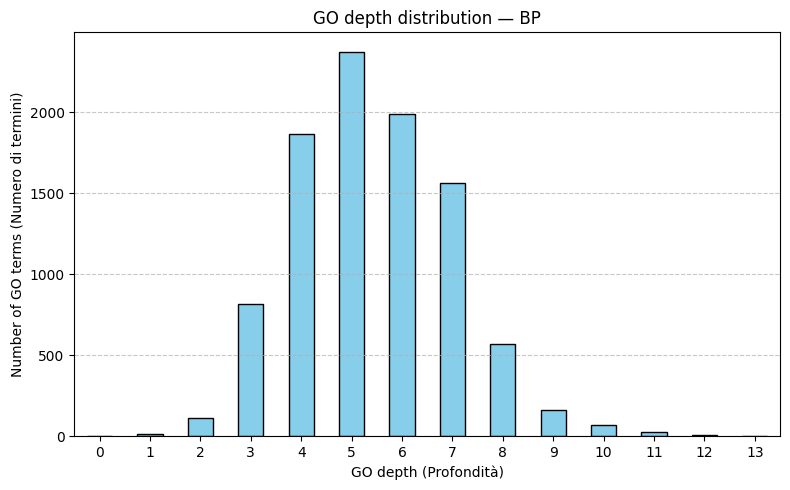

Generazione grafico CC...


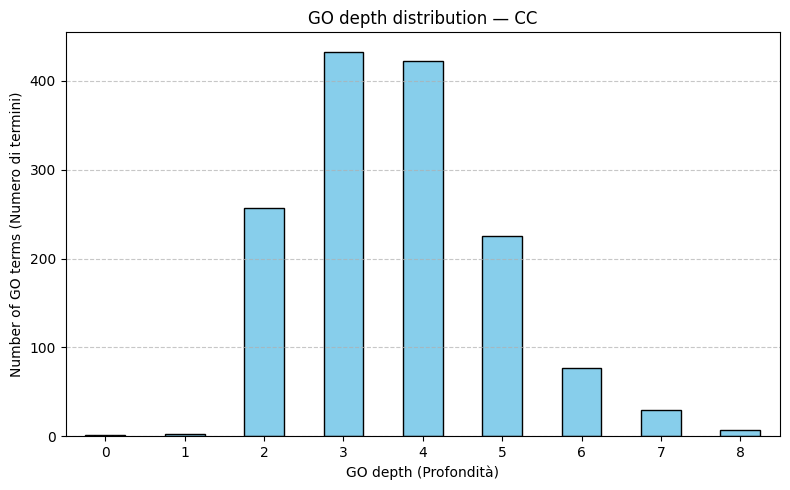

Generazione grafico MF...


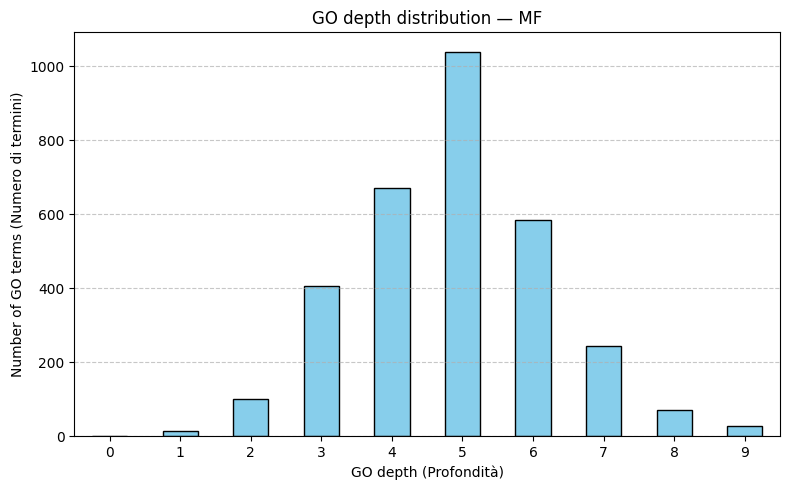

In [ ]:
import matplotlib.pyplot as plt



depth_bp_series = depth_bp['depth']
depth_cc_series = depth_cc['depth']
depth_mf_series = depth_mf['depth']

def plot_depth_distribution(depth_series, title):

    depth_counts = depth_series.value_counts().sort_index()

    plt.figure(figsize=(8, 5))

    depth_counts.plot(kind="bar", color='skyblue', edgecolor='black')

    plt.xlabel("GO depth (Profondità)")
    plt.ylabel("Number of GO terms (Numero di termini)")
    plt.title(title)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



print("Generazione grafico BP...")
plot_depth_distribution(depth_bp_series, "GO depth distribution — BP")

print("Generazione grafico CC...")
plot_depth_distribution(depth_cc_series, "GO depth distribution — CC")

print("Generazione grafico MF...")
plot_depth_distribution(depth_mf_series, "GO depth distribution — MF")

In [ ]:

DEPTH_THRESHOLD = 3

print(f"Filtraggio in corso con soglia Depth >= {DEPTH_THRESHOLD}...")


valid_bp_terms = depth_bp[depth_bp['depth'] >= DEPTH_THRESHOLD].index
valid_cc_terms = depth_cc[depth_cc['depth'] >= DEPTH_THRESHOLD].index
valid_mf_terms = depth_mf[depth_mf['depth'] >= DEPTH_THRESHOLD].index

bp_filtered = bp.loc[:, bp.columns.intersection(valid_bp_terms)]
cc_filtered = cc.loc[:, cc.columns.intersection(valid_cc_terms)]
mf_filtered = mf.loc[:, mf.columns.intersection(valid_mf_terms)]


bp_filtered = bp_filtered.loc[:, bp_filtered.sum(axis=0) > 0]
cc_filtered = cc_filtered.loc[:, cc_filtered.sum(axis=0) > 0]
mf_filtered = mf_filtered.loc[:, mf_filtered.sum(axis=0) > 0]



print("\n--- RISULTATO FILTRAGGIO ---")
print(f"BP: Da {bp.shape[1]} a {bp_filtered.shape[1]} termini GO rimasti")
print(f"CC: Da {cc.shape[1]} a {cc_filtered.shape[1]} termini GO rimasti")
print(f"MF: Da {mf.shape[1]} a {mf_filtered.shape[1]} termini GO rimasti")

Filtraggio in corso con soglia Depth >= 3...

--- RISULTATO FILTRAGGIO ---
BP: Da 9873 a 9439 termini GO rimasti
CC: Da 1478 a 1193 termini GO rimasti
MF: Da 3258 a 3042 termini GO rimasti


In [ ]:
pip install  mofax

In [ ]:
import numpy as np

common_genes = (
    set(bp_filtered.index)
    & set(cc_filtered.index)
    & set(mf_filtered.index)
    & set(hpo.index)
)

common_genes = sorted(common_genes)

print(f"Genes shared across all views: {len(common_genes)}")

# Subselect and reorder matrices
bp_mofa  = bp_filtered.loc[common_genes]
cc_mofa  = cc_filtered.loc[common_genes]
mf_mofa  = mf_filtered.loc[common_genes]
hpo_mofa = hpo.loc[common_genes]


Genes shared across all views: 5183


In [ ]:
!pip install mofapy2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 81.2 MB/s eta 0:00:00


In [ ]:
from mofapy2.run.entry_point import entry_point
import pandas as pd


view_names = ["BP", "CC", "MF", "HPO"]
groups_names = ["genes"]
sample_names = bp_mofa.index.tolist()

features_names = [
    bp_mofa.columns.tolist(),
    cc_mofa.columns.tolist(),
    mf_mofa.columns.tolist(),
    hpo_mofa.columns.tolist()
]



data = [
    [bp_mofa.values],
    [cc_mofa.values],
    [mf_mofa.values],
    [hpo_mofa.values]
]

likelihoods = ["bernoulli", "bernoulli", "bernoulli", "bernoulli"]



ent = entry_point()


ent.set_data_options(
    scale_views = False,
    scale_groups = False
)


ent.set_data_matrix(
    data = data,
    likelihoods = likelihoods,
    views_names = view_names,
    groups_names = groups_names,
    samples_names = [sample_names],
    features_names = features_names
)



        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Successfully loaded view='BP' group='genes' with N=5183 samples and D=9439 features...
Successfully loaded view='CC' group='genes' with N=5183 samples and D=1193 features...
Successfully loaded view='MF' group='genes' with N=5183 samples and D=3042 features...
Successfully loaded view='HPO' group='genes' with N=5183 samples and D=10185 features...




In [ ]:

likelihoods = ["bernoulli"] * len(view_names)

ent.set_model_options(
    factors = 15,
)



ent.set_train_options(
    iter = 500,
    convergence_mode = "fast",
    verbose = False,
    seed = 42
)



ent.build()
ent.run()

Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (BP): bernoulli
- View 1 (CC): bernoulli
- View 2 (MF): bernoulli
- View 3 (HPO): bernoulli




######################################
## Training the model with seed 42 ##
######################################


ELBO before training: -258454611.48 

Iteration 1: time=82.12, ELBO=-133646524.67, deltaELBO=124808086.816 (48.29013733%), Factors=15
Iteration 2: time=84.35, ELBO=-85545127.53, deltaELBO=48101397.142 (18.61115840%), Factors=15
Iteration 3: time=79.39, ELBO=-85432746.38, deltaELBO=112381.142 (0.04348196%), Factors=15
Iteration 4: time=81.10, ELBO=-85414599.98, deltaELBO=18146.408 (0.00702112%), Factors=15
Iteration 5: time=78.04, ELBO=-85401001.37, deltaELBO=13598.609 (0.00526151%), Factors=15
Iteration 6: time=79.94, ELBO=-853

In [ ]:
import pandas as pd


model = ent.model

Z = model.nodes["Z"].getExpectation()

n_factors = Z.shape[1]
factor_names = [f"Factor_{i+1}" for i in range(n_factors)]


Z_df = pd.DataFrame(Z, index=bp_mofa.index, columns=factor_names)

print(f"Fattori estratti con successo!")
print(f"Dimensioni: {Z_df.shape} (Geni x Fattori)")

Z_df.head()

Fattori estratti con successo!
Dimensioni: (5183, 15) (Geni x Fattori)


Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  \
10 -1.528164 -0.219360 -0.484415 -0.629754 -0.789675 -0.245350 -0.070914   
16  1.797280  1.568492  1.285880  2.524589  0.016328  0.287927  0.019602   
18 -0.093573  0.643556 -0.519884  1.134285  0.142406 -0.591759 -0.086393   
19 -0.630183  0.260709  1.130637  0.406203  0.954438  0.043279 -0.103697   
20 -0.224720  0.489900 -0.718707  0.549555  0.655517 -0.209147 -0.110507   

    Factor_8  Factor_9  Factor_10  Factor_11  Factor_12  Factor_13  Factor_14  \
10  0.438244 -0.136542  -0.441986   0.265167   0.258670  -0.582551   0.165055   
16  0.115844 -0.513638   0.519985  -4.455684   0.119780   1.431877  -0.106695   
18  0.265990 -0.361446  -0.384800   0.111004   0.329112  -0.195219  -0.160302   
19  1.167427 -0.030682   1.093844   0.274660   0.913916   0.775418   1.342394   
20  0.681516 -0.426076  -0.520482  -0.189728   0.387645   0.509050   0.479071   

    Factor_15  
10  -0.226908  
16  -0.662328  
18  -0.669971  
19  -0.320074  
20  -0.013067

In [ ]:
Z_df.shape


(5183, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd



print("Inizio standardizzazione dei fattori...")

scaler = StandardScaler()

Z_scaled = scaler.fit_transform(Z_df.values)

Z_scaled_df = pd.DataFrame(
    Z_scaled,
    index=Z_df.index,
    columns=Z_df.columns
)


print(f"Check Media (Factor_1): {Z_scaled_df['Factor_1'].mean():.4f} (Dovrebbe essere ~0)")
print(f"Check Std   (Factor_1): {Z_scaled_df['Factor_1'].std():.4f}  (Dovrebbe essere ~1)")

Z_scaled_df.head()

Inizio standardizzazione dei fattori...
Check Media (Factor_1): -0.0000 (Dovrebbe essere ~0)
Check Std   (Factor_1): 1.0001  (Dovrebbe essere ~1)


Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  \
10 -1.167742 -0.195179 -0.500654 -0.654570 -0.812740 -0.237030 -0.065600   
16  1.349100  1.292994  1.302222  2.591386  0.024552  0.299685  0.021864   
18 -0.081980  0.523096 -0.536776  1.160703  0.155524 -0.585673 -0.080557   
19 -0.488111  0.204421  1.144122  0.411474  0.999080  0.053459 -0.097278   
20 -0.181238  0.395195 -0.739258  0.558990  0.688555 -0.200594 -0.103859   

    Factor_8  Factor_9  Factor_10  Factor_11  Factor_12  Factor_13  Factor_14  \
10  0.425406 -0.125581  -0.486207   0.258761   0.251934  -0.618392   0.163288   
16  0.096268 -0.500984   0.518629  -4.650380   0.110923   1.470237  -0.120048   
18  0.249551 -0.349475  -0.426473   0.098449   0.323453  -0.216793  -0.175941   
19  1.169830 -0.020196   1.118058   0.268633   0.917193   0.789597   1.390823   
20  0.673763 -0.413814  -0.568202  -0.214278   0.382881   0.513418   0.490693   

    Factor_15  
10  -0.225033  
16  -0.660778  
18  -0.668426  
19  -0.318268  
20  -0.011033

Recupero dati dei fattori...
⚠️ 'Z_df' non trovato in memoria. Provo a caricare 'MOFA_factors.csv'...
✅ Standardizzazione completata (Z_scaled_df creato).
Calcolo similarità tra geni...


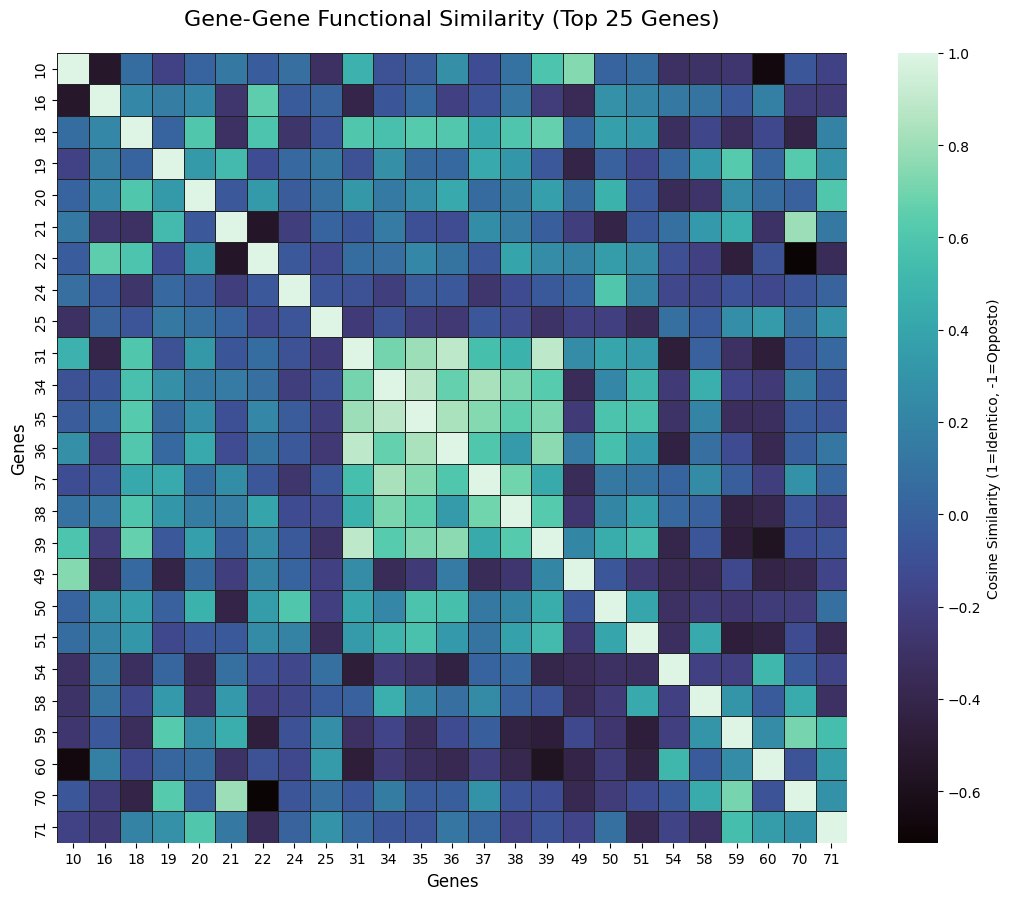


Ecco l'anteprima numerica delle similarità:
          10        16        18        19        20
10  1.000000 -0.537270  0.067727 -0.181525  0.015518
16 -0.537270  1.000000  0.218143  0.163049  0.223054
18  0.067727  0.218143  1.000000  0.015544  0.604291
19 -0.181525  0.163049  0.015544  1.000000  0.332780
20  0.015518  0.223054  0.604291  0.332780  1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


print("Recupero dati dei fattori...")

try:

    data_input = Z_df
except NameError:

    print("⚠️ 'Z_df' non trovato in memoria. Provo a caricare 'MOFA_factors.csv'...")
    try:
        data_input = pd.read_csv("MOFA_factors.csv", index_col=0)
    except FileNotFoundError:
        print("❌ ERRORE CRITICO: Non trovo né Z_df in memoria né il file MOFA_factors.csv.")
        print("Assicurati di aver caricato il file MOFA_factors.csv su Colab.")

        data_input = pd.DataFrame()

if not data_input.empty:

    scaler = StandardScaler()
    Z_scaled = scaler.fit_transform(data_input.values)


    Z_scaled_df = pd.DataFrame(
        Z_scaled,
        index=data_input.index,
        columns=data_input.columns
    )
    print("✅ Standardizzazione completata (Z_scaled_df creato).")


    print("Calcolo similarità tra geni...")
    similarity_matrix = cosine_similarity(Z_scaled_df.values)

    similarity_df = pd.DataFrame(
        similarity_matrix,
        index=Z_scaled_df.index,
        columns=Z_scaled_df.index
    )


    subset_n = 25
    similarity_subset = similarity_df.iloc[:subset_n, :subset_n]

    plt.figure(figsize=(11, 9))


    sns.heatmap(
        similarity_subset,
        cmap="mako",
        annot=False,
        linewidths=0.5,
        linecolor="#222222",
        square=True,
        cbar_kws={'label': 'Cosine Similarity (1=Identico, -1=Opposto)'}
    )

    plt.title(f"Gene-Gene Functional Similarity (Top {subset_n} Genes)", fontsize=16, pad=20)
    plt.xlabel("Genes", fontsize=12)
    plt.ylabel("Genes", fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\nEcco l'anteprima numerica delle similarità:")
    print(similarity_df.iloc[:5, :5])

else:
    print("Impossibile procedere senza dati.")

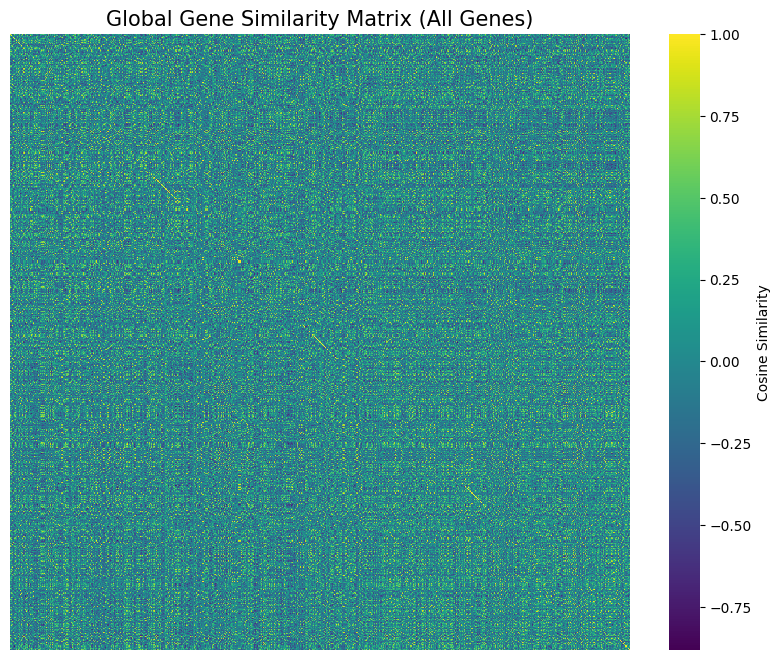

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(
    similarity_df,
    cmap="viridis",
    xticklabels=False,
    yticklabels=False,
    cbar_kws={'label': 'Cosine Similarity'}
)

plt.title("Global Gene Similarity Matrix (All Genes)", fontsize=15)
plt.show()

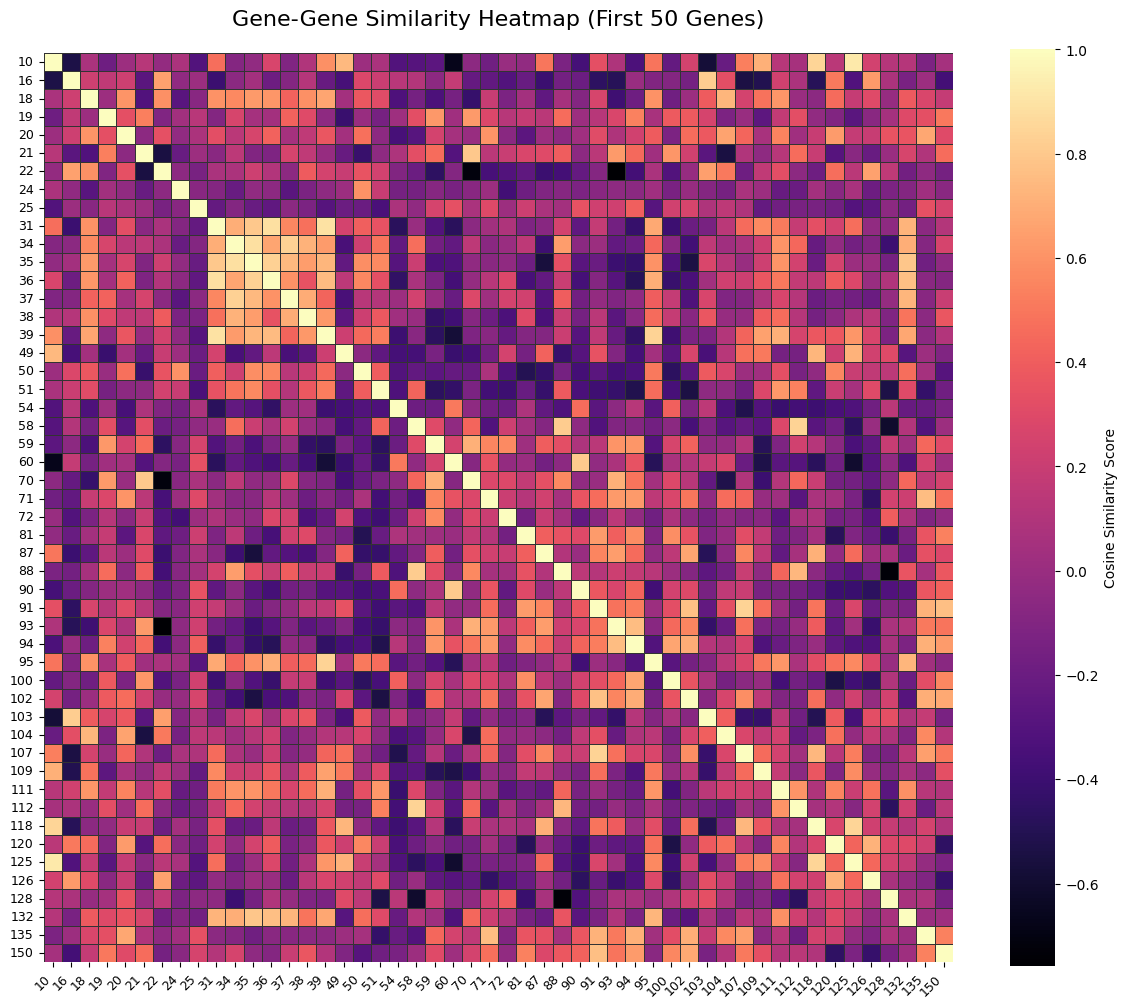

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 10))


ax = sns.heatmap(
    similarity_df.iloc[:50, :50],
    cmap="magma",
    linewidths=0.5,
    linecolor='#333333',
    square=True,
    cbar_kws={'label': 'Cosine Similarity Score'}
)


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)


ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)


plt.title("Gene-Gene Similarity Heatmap (First 50 Genes)", fontsize=16, pad=20)

plt.tight_layout()
plt.show()

1. Caricamento dati da file...
   Dati caricati. Colonne rinominate in: ['F1', 'F2', 'F3']...
   Dimensioni: (5183, 15)
2. Calcolo dei Cluster...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


3. Generazione Grafico...


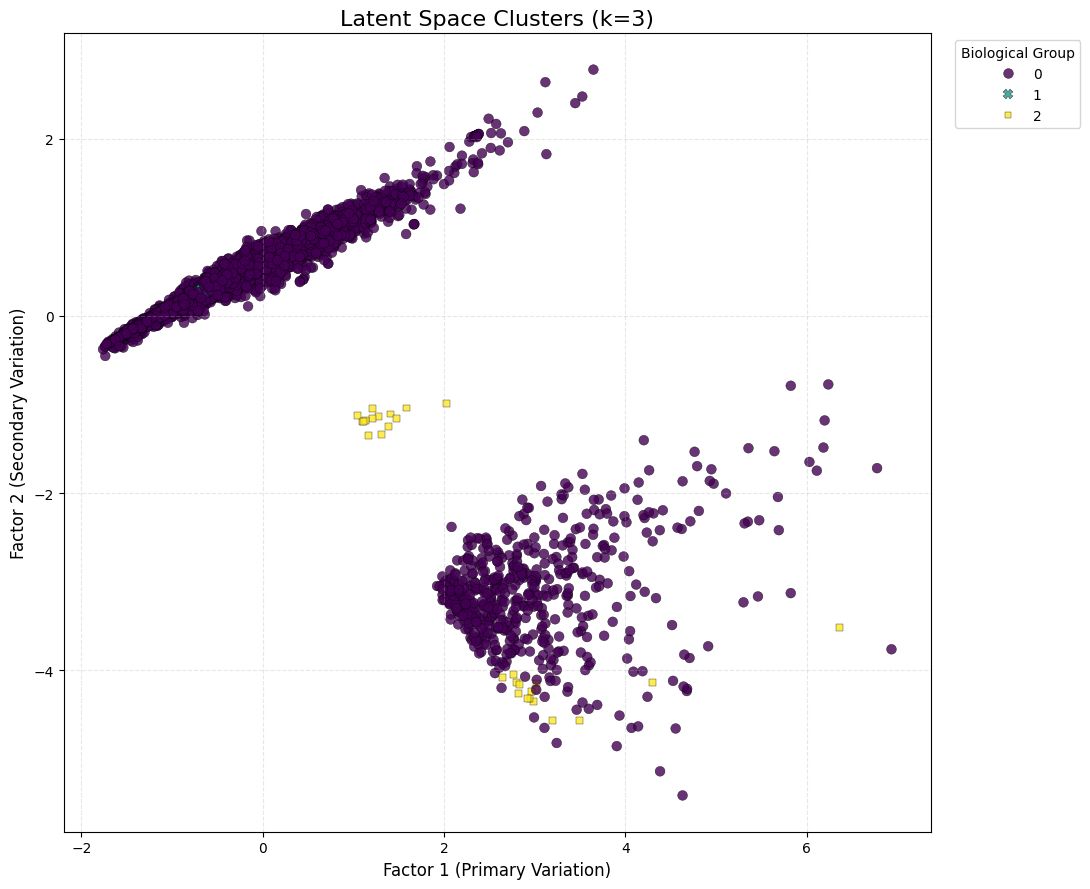


Distribuzione Geni nei Cluster:
Cluster
0    5106
1      48
2      29
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler


print("1. Caricamento dati da file...")
try:

    Z_df = pd.read_csv("MOFA_factors.csv", index_col=0)

    num_cols = Z_df.shape[1]
    new_names = [f"F{i+1}" for i in range(num_cols)]
    Z_df.columns = new_names

    print(f"   Dati caricati. Colonne rinominate in: {new_names[:3]}...")
    print(f"   Dimensioni: {Z_df.shape}")

except FileNotFoundError:
    print("❌ ERRORE: Manca il file 'MOFA_factors.csv'. Caricalo a sinistra!")
    raise

print("2. Calcolo dei Cluster...")

scaler = StandardScaler()
Z_scaled_matrix = scaler.fit_transform(Z_df.values)

n_clusters = 3
sc = SpectralClustering(
    n_clusters=n_clusters,
    affinity='nearest_neighbors',
    n_neighbors=15,
    random_state=42,
    n_jobs=-1
)

labels = sc.fit_predict(Z_scaled_matrix)

Z_df["Cluster"] = labels

print("3. Generazione Grafico...")

plt.figure(figsize=(11, 9))

sns.scatterplot(
    data=Z_df,
    x="F1",
    y="F2",
    hue="Cluster",
    palette="viridis",
    style="Cluster",
    alpha=0.8,
    s=50,
    edgecolor="black",
    linewidth=0.3
)

plt.title(f"Latent Space Clusters (k={n_clusters})", fontsize=16)
plt.xlabel("Factor 1 (Primary Variation)", fontsize=12)
plt.ylabel("Factor 2 (Secondary Variation)", fontsize=12)
plt.legend(title="Biological Group", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Verifica conteggi
print("\nDistribuzione Geni nei Cluster:")
print(Z_df["Cluster"].value_counts().sort_index())

Preparazione dati per l'analisi Silhouette...
Dati pronti. Analizzo 5183 geni su 15 fattori.

Inizio calcolo (questo passaggio può impiegare 1-2 minuti)...
   k=2 -> Silhouette Score: 0.3331
   k=3 -> Silhouette Score: 0.3357
   k=4 -> Silhouette Score: 0.1388
   k=5 -> Silhouette Score: 0.1357
   k=6 -> Silhouette Score: 0.1400
   k=7 -> Silhouette Score: 0.1653
   k=8 -> Silhouette Score: 0.1792
   k=9 -> Silhouette Score: 0.1695
   k=10 -> Silhouette Score: 0.1903

🏆 Miglior numero di cluster (k): 3 (Score: 0.3357)


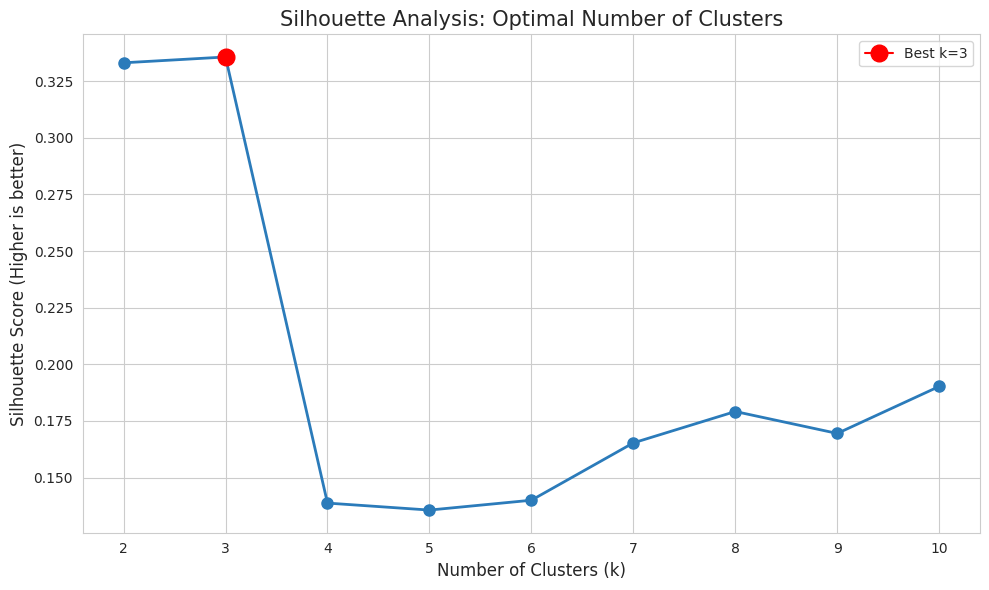

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Preparazione dati per l'analisi Silhouette...")

try:
    if 'Z_df' not in locals():
        Z_df = pd.read_csv("MOFA_factors.csv", index_col=0)
except:
    print("Errore: manca Z_df o il CSV.")

cols_to_drop = ['cluster', 'Cluster']
data_for_clustering = Z_df.drop(columns=[c for c in cols_to_drop if c in Z_df.columns], errors='ignore')

scaler = StandardScaler()
Z_scaled = scaler.fit_transform(data_for_clustering.values)

print(f"Dati pronti. Analizzo {Z_scaled.shape[0]} geni su {Z_scaled.shape[1]} fattori.")

print("\nInizio calcolo (questo passaggio può impiegare 1-2 minuti)...")

Ks = range(2, 11)
sil_scores = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = km.fit_predict(Z_scaled)

    score = silhouette_score(Z_scaled, labels_k)
    sil_scores.append(score)
    print(f"   k={k} -> Silhouette Score: {score:.4f}")

best_k = Ks[int(np.argmax(sil_scores))]
best_score = max(sil_scores)

print(f"\n🏆 Miglior numero di cluster (k): {best_k} (Score: {best_score:.4f})")

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(Ks, sil_scores, marker='o', linestyle='-', color='#2b7bba', linewidth=2, markersize=8)

plt.plot(best_k, best_score, marker='o', color='red', markersize=12, label=f"Best k={best_k}")

plt.title("Silhouette Analysis: Optimal Number of Clusters", fontsize=15)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score (Higher is better)", fontsize=12)
plt.xticks(Ks)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


print("Controllo dati in memoria...")
try:
    if 'Z_df' not in locals():
        Z_df = pd.read_csv("MOFA_factors.csv", index_col=0)
        new_names = [f"F{i+1}" for i in range(Z_df.shape[1])]
        Z_df.columns = new_names
except:
    print("❌ ERRORE: Manca il file 'MOFA_factors.csv'.")
    raise


print("\n--- Inizio Pulizia Dati ---")

Z_clean = Z_df.copy()

cols_to_remove = [c for c in Z_clean.columns if 'lust' in c]
if cols_to_remove:
    print(f"Rimozione colonne extra: {cols_to_remove}")
    Z_clean = Z_clean.drop(columns=cols_to_remove)

var_factors = Z_clean.var()
Z_clean = Z_clean.loc[:, var_factors > 0]
print(f"Fattori utilizzati (con varianza > 0): {Z_clean.shape[1]}")

Z_clean = Z_clean.dropna(axis=0)
print(f"Geni rimasti dopo pulizia NaN: {Z_clean.shape[0]}")


print("\n--- Calcolo Similarità (Standardizzata) ---")

scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z_clean.values)

similarity_matrix = cosine_similarity(Z_scaled)

sim = pd.DataFrame(
    similarity_matrix,
    index=Z_clean.index,
    columns=Z_clean.index
)

nan_count = sim.isna().sum().sum()
print(f"Check finale: NaN nella matrice di similarità = {nan_count}")

if nan_count == 0:
    print("✅ Tutto perfetto! La matrice 'sim' è pronta per essere visualizzata.")
else:
    print("⚠️ Attenzione: ci sono ancora valori mancanti.")

Controllo dati in memoria...

--- Inizio Pulizia Dati ---
Rimozione colonne extra: ['Cluster']
Fattori utilizzati (con varianza > 0): 15
Geni rimasti dopo pulizia NaN: 5183

--- Calcolo Similarità (Standardizzata) ---
Check finale: NaN nella matrice di similarità = 0
✅ Tutto perfetto! La matrice 'sim' è pronta per essere visualizzata.


✅ Utilizzo il numero ottimale di cluster trovato: k=3
Avvio Spectral Clustering con k=3...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



--- Distribuzione Geni per Cluster ---
Cluster 0: 5106 geni
Cluster 1: 48 geni
Cluster 2: 29 geni

Generazione mappa finale dei cluster...


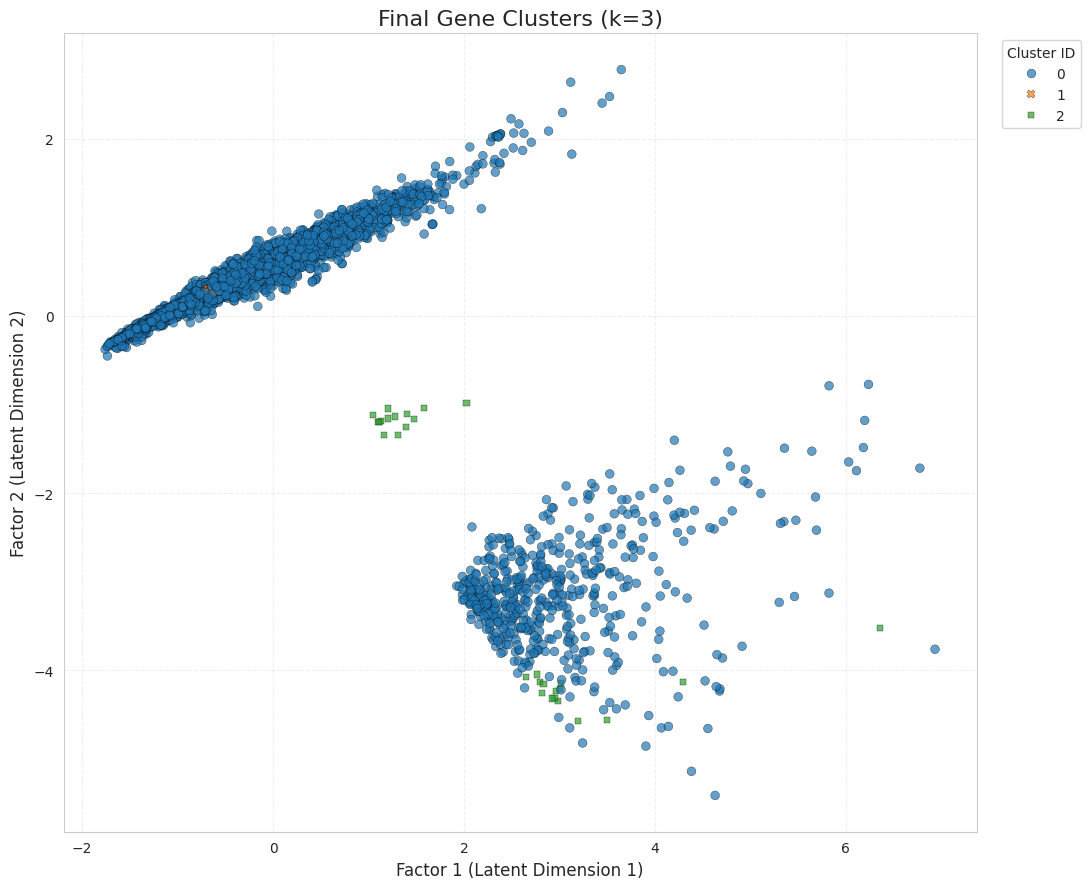

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


try:
    k_final = best_k
    print(f"✅ Utilizzo il numero ottimale di cluster trovato: k={k_final}")
except NameError:
    print("⚠️ Variabile 'best_k' non trovata. Uso k=3 di default.")
    k_final = 3


print(f"Avvio Spectral Clustering con k={k_final}...")

sc = SpectralClustering(
    n_clusters=k_final,
    affinity='nearest_neighbors',
    n_neighbors=15,
    random_state=42,
    n_jobs=-1
)

labels = sc.fit_predict(Z_scaled)

Z_clean["cluster"] = labels


unique, counts = np.unique(labels, return_counts=True)
print("\n--- Distribuzione Geni per Cluster ---")
for c, n in zip(unique, counts):
    print(f"Cluster {c}: {n} geni")

print("\nGenerazione mappa finale dei cluster...")

plt.figure(figsize=(11, 9))


sns.scatterplot(
    data=Z_clean,
    x=Z_clean.columns[0],
    y=Z_clean.columns[1],
    hue="cluster",
    palette="tab10",
    style="cluster",
    alpha=0.7,
    s=40,
    edgecolor="black",
    linewidth=0.3
)

plt.title(f"Final Gene Clusters (k={k_final})", fontsize=16)
plt.xlabel("Factor 1 (Latent Dimension 1)", fontsize=12)
plt.ylabel("Factor 2 (Latent Dimension 2)", fontsize=12)
plt.legend(title="Cluster ID", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


print("Calcolo matrice di similarità (Gene vs Gene)...")
sim = Z_scaled_df.T.corr()


print("Esecuzione Clustering (K-Means)...")
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(Z_scaled_df)

Z_clean = Z_scaled_df.copy()
Z_clean['cluster'] = clusters


print("Ordinamento dei geni in base ai cluster...")

sim_for_plot = sim.loc[Z_clean.index, Z_clean.index]

order = np.argsort(Z_clean["cluster"].values)

genes_ordered = sim_for_plot.index[order]

sim_ordered = sim_for_plot.loc[genes_ordered, genes_ordered]


print(f"Matrice riordinata pronta!")
print(f"Dimensioni: {sim_ordered.shape}")
print("Primi 5 geni ordinati:", genes_ordered[:5].tolist())

Calcolo matrice di similarità (Gene vs Gene)...
Esecuzione Clustering (K-Means)...
Ordinamento dei geni in base ai cluster...
Matrice riordinata pronta!
Dimensioni: (5183, 5183)
Primi 5 geni ordinati: [1761, 1959, 2034, 2019, 2000]


Generazione Heatmap in corso... (potrebbe volerci qualche secondo)


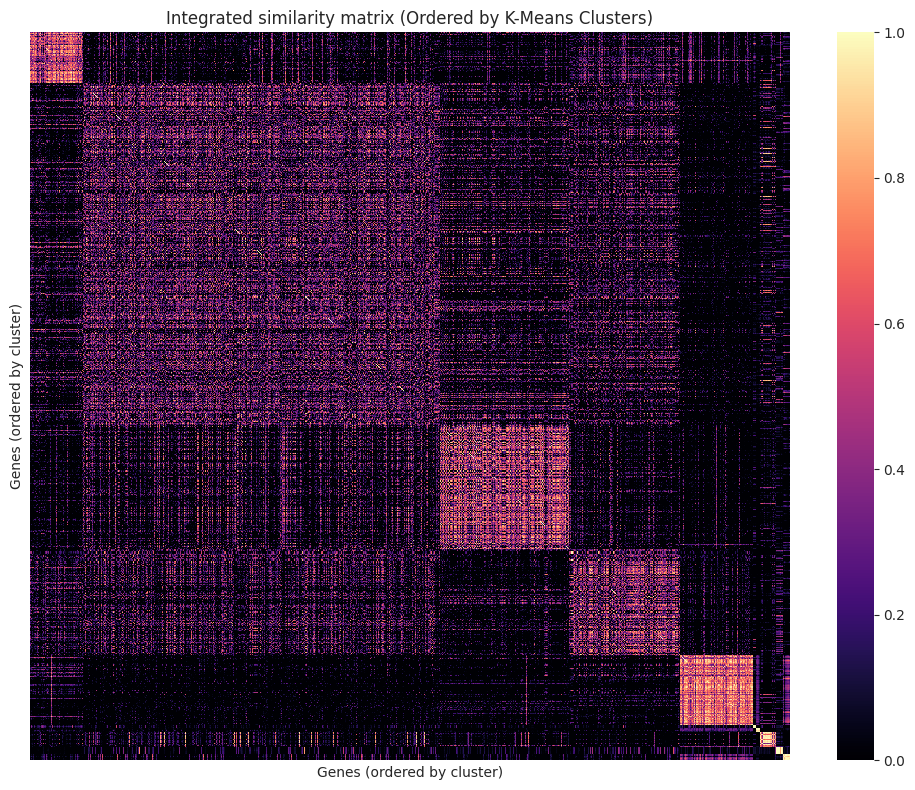

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

print("Generazione Heatmap in corso... (potrebbe volerci qualche secondo)")

ax = sns.heatmap(sim_ordered,
                 cmap="magma",
                 vmin=0, vmax=1,
                 xticklabels=False,
                 yticklabels=False)

plt.title("Integrated similarity matrix (Ordered by K-Means Clusters)")
plt.xlabel("Genes (ordered by cluster)")
plt.ylabel("Genes (ordered by cluster)")

plt.tight_layout()
plt.show()

In [ ]:
!pip install umap-learn

In [ ]:
import umap
import numpy as np
import pandas as pd

print("Calcolo proiezione UMAP...")

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42
)

umap_coords = reducer.fit_transform(Z_scaled)

UMAP_df = pd.DataFrame({
    "UMAP1": umap_coords[:,0],
    "UMAP2": umap_coords[:,1],
    "cluster": Z_clean["cluster"].values
}, index=Z_clean.index)

print("Coordinate calcolate!")
UMAP_df.head()

Calcolo proiezione UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Coordinate calcolate!


UMAP1      UMAP2  cluster
10   6.722762  12.152843        1
16  11.869678  11.074840        2
18   8.640216  10.255592        1
19   5.466578  10.252264        3
20   9.505103   9.965302        1

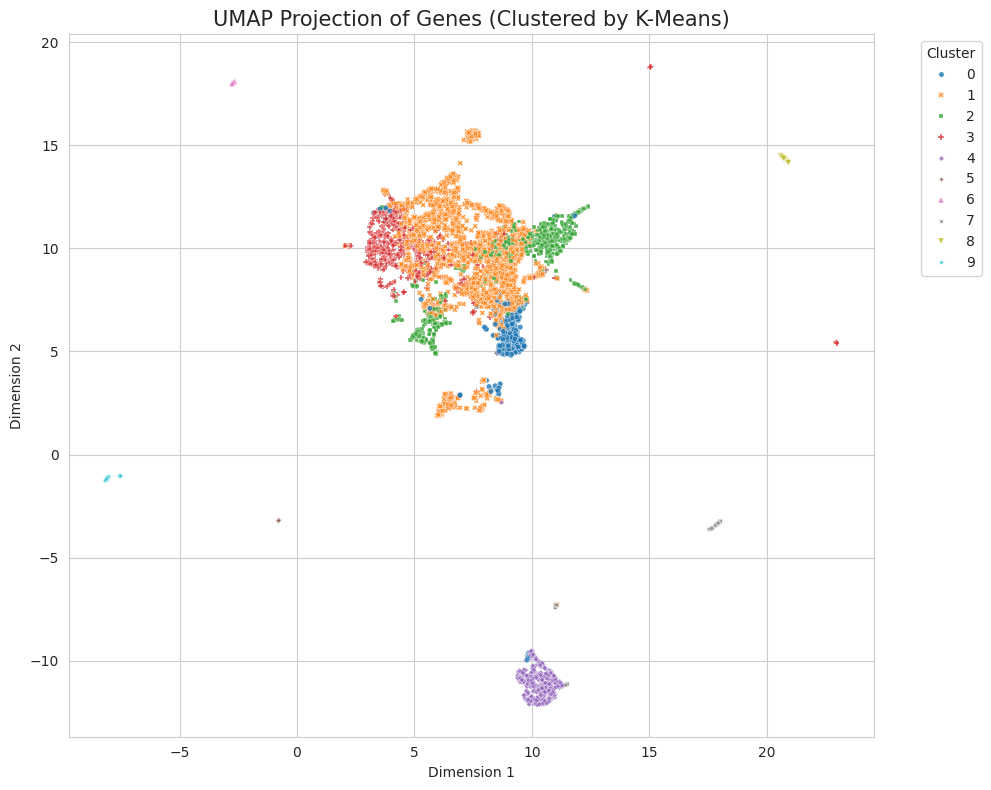

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=UMAP_df,
    x='UMAP1',
    y='UMAP2',
    hue='cluster',
    palette='tab10',
    style='cluster',
    s=15,
    alpha=0.8,
    legend='full'
)

plt.title("UMAP Projection of Genes (Clustered by K-Means)", fontsize=15)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Cluster")

plt.tight_layout()
plt.show()

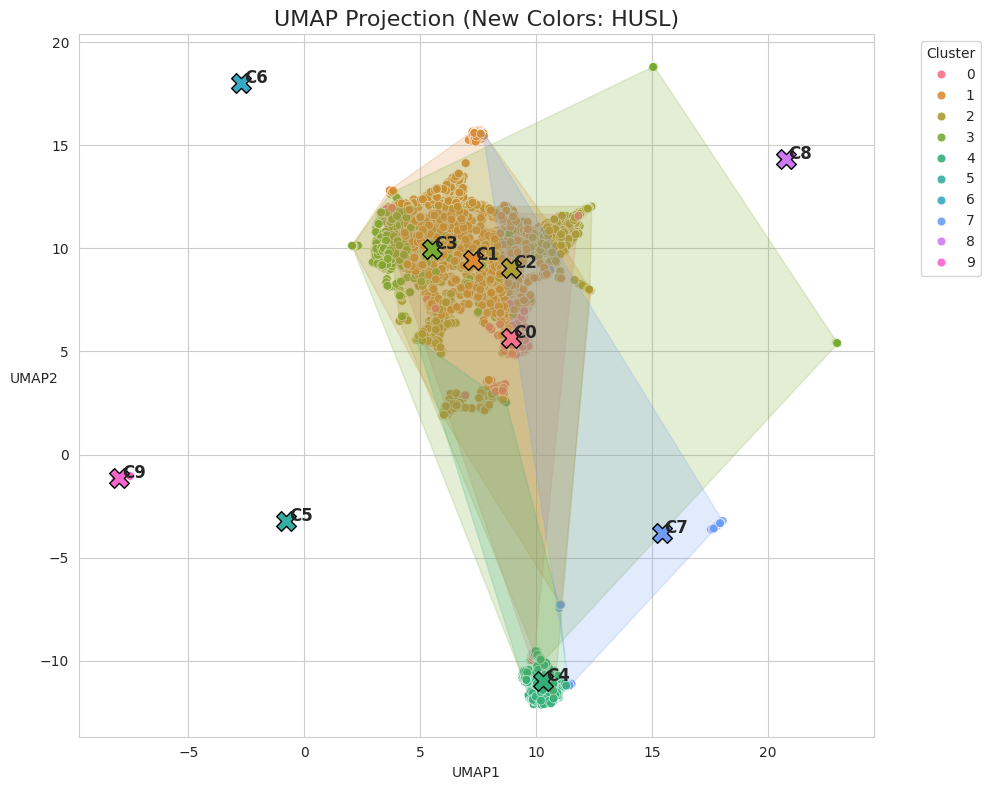

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull

plt.figure(figsize=(10, 8))

n_clusters = len(UMAP_df["cluster"].unique())

palette = sns.color_palette("husl", n_clusters)

sns.scatterplot(
    data=UMAP_df,
    x="UMAP1",
    y="UMAP2",
    hue="cluster",
    palette=palette,
    s=40,
    alpha=0.9,
    legend="full"
)

unique_clusters = sorted(UMAP_df["cluster"].unique())

for i, c in enumerate(unique_clusters):
    subset = UMAP_df[UMAP_df["cluster"] == c][["UMAP1", "UMAP2"]].values

    if len(subset) == 0: continue

    centroid = subset.mean(axis=0)

    current_color = palette[i]

    plt.scatter(centroid[0], centroid[1], marker="X", s=200, color=[current_color], edgecolor="black", zorder=10)
    plt.text(centroid[0]+0.1, centroid[1], f"C{c}", fontsize=12, weight="bold", zorder=11)

    if subset.shape[0] > 3:
        hull = ConvexHull(subset)
        hull_points = subset[hull.vertices]
        plt.fill(
            hull_points[:,0],
            hull_points[:,1],
            alpha=0.2,
            color=current_color
        )

plt.title("UMAP Projection (New Colors: HUSL)", fontsize=16)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2", rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
clusters = {}
for c in sorted(Z_clean["cluster"].unique()):
    clusters[c] = Z_clean.index[Z_clean["cluster"] == c].tolist()

print("--- Analisi dei Cluster ---")
for c, genes_in_cluster in clusters.items():
    print(f"Cluster {c}: contiene {len(genes_in_cluster)} geni. \t Esempi: {genes_in_cluster[:5]}...")

--- Analisi dei Cluster ---
Cluster 0: contiene 361 geni. 	 Esempi: [190, 326, 351, 367, 401]...
Cluster 1: contiene 2434 geni. 	 Esempi: [10, 18, 20, 31, 36]...
Cluster 2: contiene 884 geni. 	 Esempi: [16, 22, 34, 35, 51]...
Cluster 3: contiene 753 geni. 	 Esempi: [19, 21, 37, 59, 70]...
Cluster 4: contiene 500 geni. 	 Esempi: [54, 60, 90, 175, 176]...
Cluster 5: contiene 18 geni. 	 Esempi: [2006, 2969, 3984, 5982, 6804]...
Cluster 6: contiene 29 geni. 	 Esempi: [25, 165, 444, 633, 875]...
Cluster 7: contiene 108 geni. 	 Esempi: [24, 196, 403, 582, 583]...
Cluster 8: contiene 48 geni. 	 Esempi: [1767, 1770, 2302, 2622, 6103]...
Cluster 9: contiene 48 geni. 	 Esempi: [249, 258, 649, 871, 1277]...


In [ ]:
import pandas as pd


print("Caricamento matrici originali per l'analisi biologica...")

f_bp = "gene_go_matrix_propT_rel-is_a-part_of_ont-BP.csv"
f_hpo = "gene_hpo_matrix_binary_withAncestors_namespace_Phenotypic abnormality.csv"

try:
    bp = pd.read_csv(f_bp, index_col=0)
    hpo = pd.read_csv(f_hpo, index_col=0)
    print("Matrici originali caricate.")
except FileNotFoundError:
    print(f"ERRORE: Non trovo i file '{f_bp}' o '{f_hpo}'. Devi caricarli su Colab!")

genes_used = Z_scaled_df.index

bp_mofa = bp.reindex(genes_used).dropna()
hpo_mofa = hpo.reindex(genes_used).dropna()

print(f"Dati allineati! BP: {bp_mofa.shape}, HPO: {hpo_mofa.shape}")


def cluster_enrichment(binary_matrix, gene_list, top_k=10):
    valid_genes = [g for g in gene_list if g in binary_matrix.index]
    if not valid_genes: return pd.DataFrame()
    sub = binary_matrix.loc[valid_genes]
    freq_cluster = sub.mean(axis=0)
    freq_total = binary_matrix.mean(axis=0)
    enrichment = (freq_cluster + 1e-6) / (freq_total + 1e-6)
    df = pd.DataFrame({"freq_cluster": freq_cluster, "enrichment": enrichment})
    return df.sort_values("enrichment", ascending=False).head(top_k)

target_cluster = 0
genes_in_cluster = clusters[target_cluster]

print(f"\n--- RISULTATI ANALISI BIOLOGICA (CLUSTER {target_cluster}) ---")

print("\n>>> Top 10 Processi Biologici (BP):")
print(cluster_enrichment(bp_mofa, genes_in_cluster, top_k=10))

print("\n>>> Top 10 Fenotipi (HPO):")
print(cluster_enrichment(hpo_mofa, genes_in_cluster, top_k=10))

Caricamento matrici originali per l'analisi biologica...
Matrici originali caricate.
Dati allineati! BP: (5183, 9873), HPO: (5183, 10185)

--- RISULTATI ANALISI BIOLOGICA (CLUSTER 0) ---

>>> Top 10 Processi Biologici (BP):
            freq_cluster  enrichment
GO.0021877       0.01662   14.345812
GO.0021780       0.01385   14.343509
GO.0021902       0.01385   14.343509
GO.0003310       0.01385   14.343509
GO.0060214       0.01108   14.340055
GO.0046016       0.01108   14.340055
GO.1901723       0.01108   14.340055
GO.0003278       0.01108   14.340055
GO.0072307       0.01108   14.340055
GO.0060486       0.01108   14.340055

>>> Top 10 Fenotipi (HPO):
            freq_cluster  enrichment
HP:0011388       0.01108   14.340055
HP:0040106       0.00831   14.334303
HP:0000860       0.00831   14.334303
HP:0010078       0.00554   14.322815
HP:0033536       0.00554   14.322815
HP:0010757       0.00554   14.322815
HP:0011240       0.00554   14.322815
HP:0025584       0.00554   14.322815
HP:00318

In [ ]:
pip install networkx

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

print("Creazione del grafo (Versione Ottimizzata)...")


genes = Z_clean.index
sim_sub = sim.loc[genes, genes].copy()

THRESHOLD = 0.8


sim_sub[sim_sub < THRESHOLD] = 0
np.fill_diagonal(sim_sub.values, 0)


G = nx.from_pandas_adjacency(sim_sub)

cluster_dict = Z_clean["cluster"].to_dict()
nx.set_node_attributes(G, cluster_dict, "cluster")

G.remove_nodes_from(list(nx.isolates(G)))

print(f"Grafo creato con successo!")
print(f"Nodi (Geni): {G.number_of_nodes()}")
print(f"Archi (Connessioni > {THRESHOLD}): {G.number_of_edges()}")



nx.write_gexf(G, "grafo_geni_totale.gexf")
print("Grafo salvato in 'grafo_geni_totale.gexf'. Puoi scaricarlo e aprirlo con Gephi.")

Creazione del grafo (Versione Ottimizzata)...
Grafo creato con successo!
Nodi (Geni): 5117
Archi (Connessioni > 0.8): 134078
Grafo salvato in 'grafo_geni_totale.gexf'. Puoi scaricarlo e aprirlo con Gephi.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx


num_nodes = G.number_of_nodes()
print(f"Tentativo di disegnare un grafo con {num_nodes} nodi...")

if num_nodes > 3000:
    print("⚠️ ATTENZIONE: Il grafo è troppo grande (>3000 nodi)!")
    print("Il disegno potrebbe bloccare Colab o risultare una macchia illeggibile.")
    print("Consiglio: Alza la soglia THRESHOLD nel passaggio precedente (es. 0.9 o 0.95) e rifai il grafo.")
else:

    print("Calcolo della posizione dei nodi (Spring Layout)...")
    k_val = 0.5 if num_nodes < 500 else 0.15
    pos = nx.spring_layout(G, seed=42, k=k_val, iterations=50)

    clusters_attr = nx.get_node_attributes(G, "cluster")

    unique_clusters = sorted(list(set(clusters_attr.values())))

    cmap = plt.cm.get_cmap("tab20", len(unique_clusters))

    node_colors = []
    for node in G.nodes():
        cluster_id = clusters_attr[node]
        color_idx = unique_clusters.index(cluster_id)
        node_colors.append(cmap(color_idx))

    plt.figure(figsize=(12, 12))

    nx.draw_networkx_edges(
        G, pos,
        alpha=0.2,
        edge_color="gray",
        width=0.5
    )

    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=30,
        linewidths=0.5,
        edgecolors='white'
    )

    for i, c in enumerate(unique_clusters):
        plt.scatter([], [], color=cmap(i), label=f"Cluster {c}")

    plt.legend(scatterpoints=1, frameon=True, title="Cluster", loc='upper right')

    plt.title(f"Gene Interaction Network (Sim >= {THRESHOLD})", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

Tentativo di disegnare un grafo con 5117 nodi...
⚠️ ATTENZIONE: Il grafo è troppo grande (>3000 nodi)!
Il disegno potrebbe bloccare Colab o risultare una macchia illeggibile.
Consiglio: Alza la soglia THRESHOLD nel passaggio precedente (es. 0.9 o 0.95) e rifai il grafo.


Rigenerazione del grafo con soglia 0.95...
Nuovo numero di nodi: 2375
Disegno in corso...


/tmp/ipython-input-792405961.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(unique_clusters))


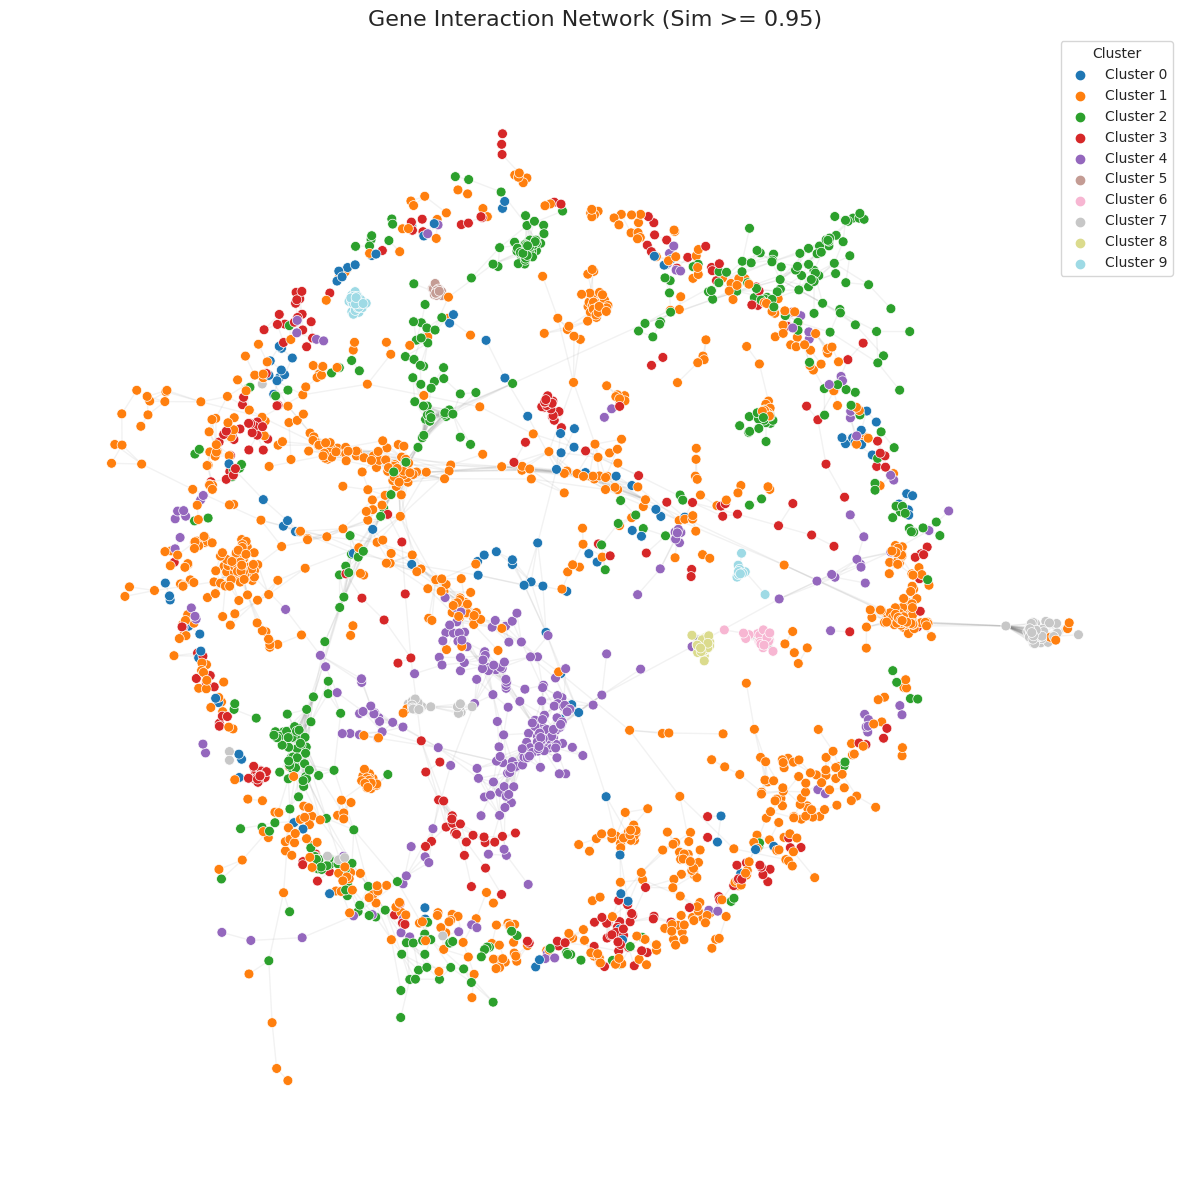

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


THRESHOLD = 0.95

print(f"Rigenerazione del grafo con soglia {THRESHOLD}...")

genes = Z_clean.index
sim_sub = sim.loc[genes, genes].copy()

sim_sub[sim_sub < THRESHOLD] = 0
np.fill_diagonal(sim_sub.values, 0)

G = nx.from_pandas_adjacency(sim_sub)

cluster_dict = Z_clean["cluster"].to_dict()
nx.set_node_attributes(G, cluster_dict, "cluster")

G.remove_nodes_from(list(nx.isolates(G)))

num_nodes = G.number_of_nodes()
print(f"Nuovo numero di nodi: {num_nodes}")


if num_nodes > 3000:
    print("Ancora troppi nodi! Alza la soglia a 0.98")
elif num_nodes == 0:
    print("Soglia troppo alta! Nessun gene supera il 0.95. Prova 0.90")
else:
    print("Disegno in corso...")
    plt.figure(figsize=(12, 12))

    pos = nx.spring_layout(G, seed=42, k=0.15, iterations=50)


    clusters_attr = nx.get_node_attributes(G, "cluster")
    unique_clusters = sorted(list(set(clusters_attr.values())))
    cmap = plt.cm.get_cmap("tab20", len(unique_clusters))

    node_colors = [cmap(unique_clusters.index(clusters_attr[n])) for n in G.nodes()]

    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color="gray")
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50, edgecolors="white", linewidths=0.5)

    for i, c in enumerate(unique_clusters):
        plt.scatter([], [], color=cmap(i), label=f"Cluster {c}")

    plt.legend(scatterpoints=1, frameon=True, title="Cluster")
    plt.title(f"Gene Interaction Network (Sim >= {THRESHOLD})", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

Caricamento dei fattori da CSV...
✅ Dati caricati e standardizzati correttamente.
Eseguo clustering K-Means...
Grafico generato sui top 200 geni per leggibilità.
Disegno il grafo (200 nodi)...


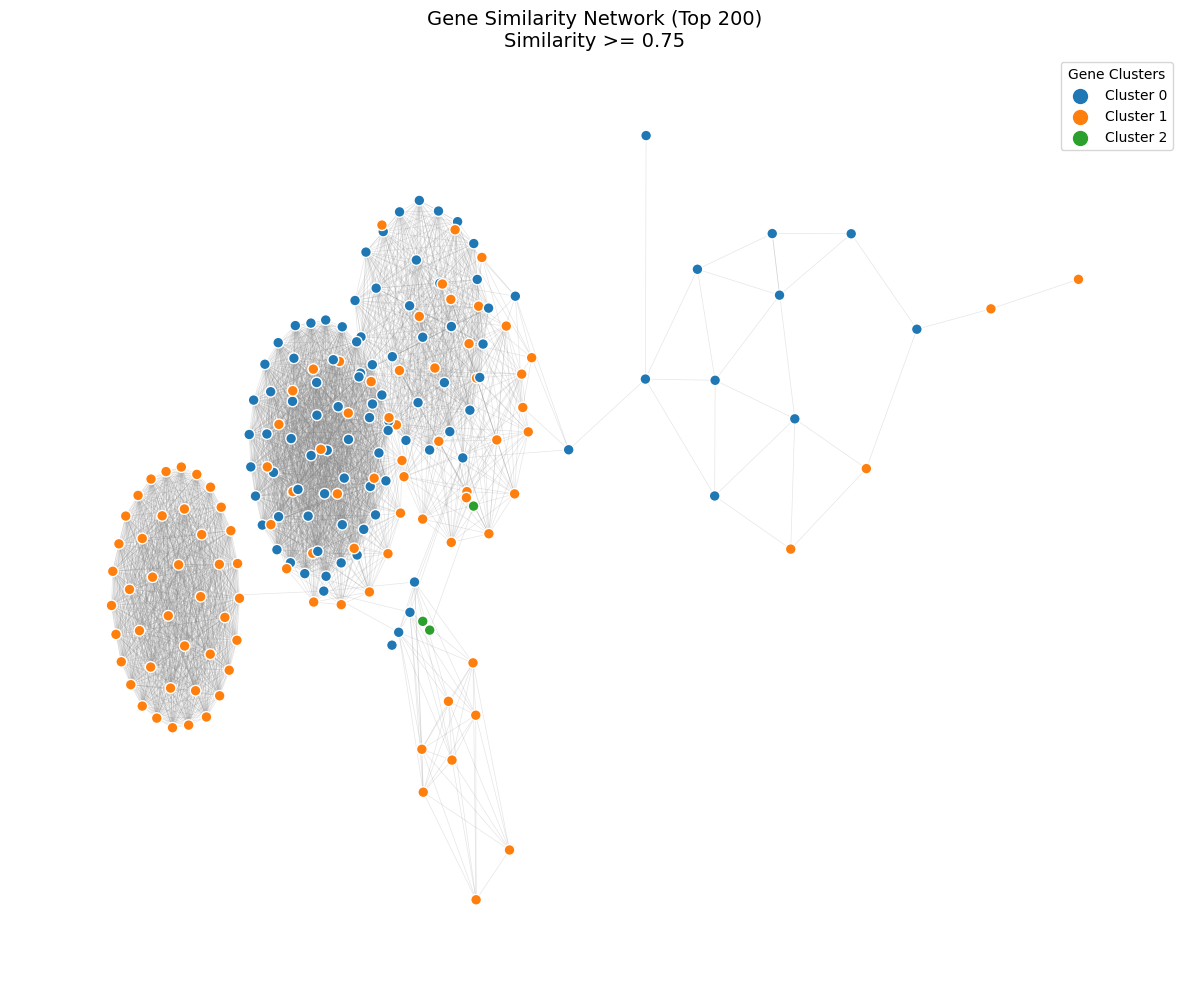

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


print("Caricamento dei fattori da CSV...")

try:
    Z_df = pd.read_csv("MOFA_factors.csv", index_col=0)

    scaler = StandardScaler()
    Z_scaled = scaler.fit_transform(Z_df.values)

    Z_scaled_df = pd.DataFrame(
        Z_scaled,
        index=Z_df.index,
        columns=Z_df.columns
    )
    print("✅ Dati caricati e standardizzati correttamente.")

except FileNotFoundError:
    print("❌ ERRORE: Non trovo il file 'MOFA_factors.csv'. Caricalo nella cartella a sinistra!")
    raise


print("Eseguo clustering K-Means...")

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(Z_scaled_df)

df_vis = Z_scaled_df.copy()
df_vis['cluster'] = cluster_labels


variances = df_vis.iloc[:, :-1].var(axis=1)
top_genes = variances.sort_values(ascending=False).head(200).index
df_subset = df_vis.loc[top_genes]

print(f"Grafico generato sui top {len(df_subset)} geni per leggibilità.")


matrix_for_sim = df_subset.iloc[:, :-1].values
sim_matrix = cosine_similarity(matrix_for_sim)

G = nx.Graph()
THRESHOLD = 0.75

genes = df_subset.index.tolist()
clusters_dict = df_subset['cluster'].to_dict()

for gene in genes:
    G.add_node(gene, cluster=clusters_dict[gene])

rows, cols = sim_matrix.shape
for i in range(rows):
    for j in range(i + 1, cols):
        if sim_matrix[i, j] >= THRESHOLD:
            G.add_edge(genes[i], genes[j], weight=sim_matrix[i, j])

print(f"Disegno il grafo ({G.number_of_nodes()} nodi)...")

pos = nx.kamada_kawai_layout(G)

cluster_palette = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c", 3: "#d62728", 4: "#9467bd"}
clusters_attr = nx.get_node_attributes(G, "cluster")
node_colors = [cluster_palette[clusters_attr[node]] for node in G.nodes()]
unique_clusters = sorted(list(set(clusters_attr.values())))

plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5, edge_color="grey")
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=60, edgecolors='white', linewidths=1)

for c in unique_clusters:
    plt.scatter([], [], color=cluster_palette[c], label=f"Cluster {c}", s=100)

plt.legend(scatterpoints=1, frameon=True, title="Gene Clusters", loc='upper right')
plt.title(f"Gene Similarity Network (Top 200)\nSimilarity >= {THRESHOLD}", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import networkx as nx
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


target_df = df_subset


print("Calcolo similarità...")
sim_matrix = cosine_similarity(target_df.iloc[:, :-1])
sim_df = pd.DataFrame(sim_matrix, index=target_df.index, columns=target_df.index)


THRESHOLD = 0.75

print(f"Costruzione grafo con soglia similarità >= {THRESHOLD}...")

G_full = nx.Graph()
genes = target_df.index.tolist()

for gene in genes:
    cluster_val = int(target_df.loc[gene, "cluster"])
    G_full.add_node(gene, cluster=cluster_val)

count_edges = 0
for i, g1 in enumerate(genes):
    for j in range(i+1, len(genes)):
        g2 = genes[j]

        w = sim_df.loc[g1, g2]

        if w >= THRESHOLD:
            G_full.add_edge(g1, g2, weight=float(w))
            count_edges += 1


print(f"\nGrafo completato!")
print(f"Nodi: {G_full.number_of_nodes()}")
print(f"Archi: {G_full.number_of_edges()}")

if G_full.number_of_edges() == 0:
    print("⚠️ ATTENZIONE: Nessun arco creato. Prova ad abbassare la THRESHOLD (es. 0.6 o 0.7).")

Calcolo similarità...
Costruzione grafo con soglia similarità >= 0.75...

Grafo completato!
Nodi: 200
Archi: 2893


Nodi nel grafo ridotto: 103
Archi nel grafo ridotto: 2019


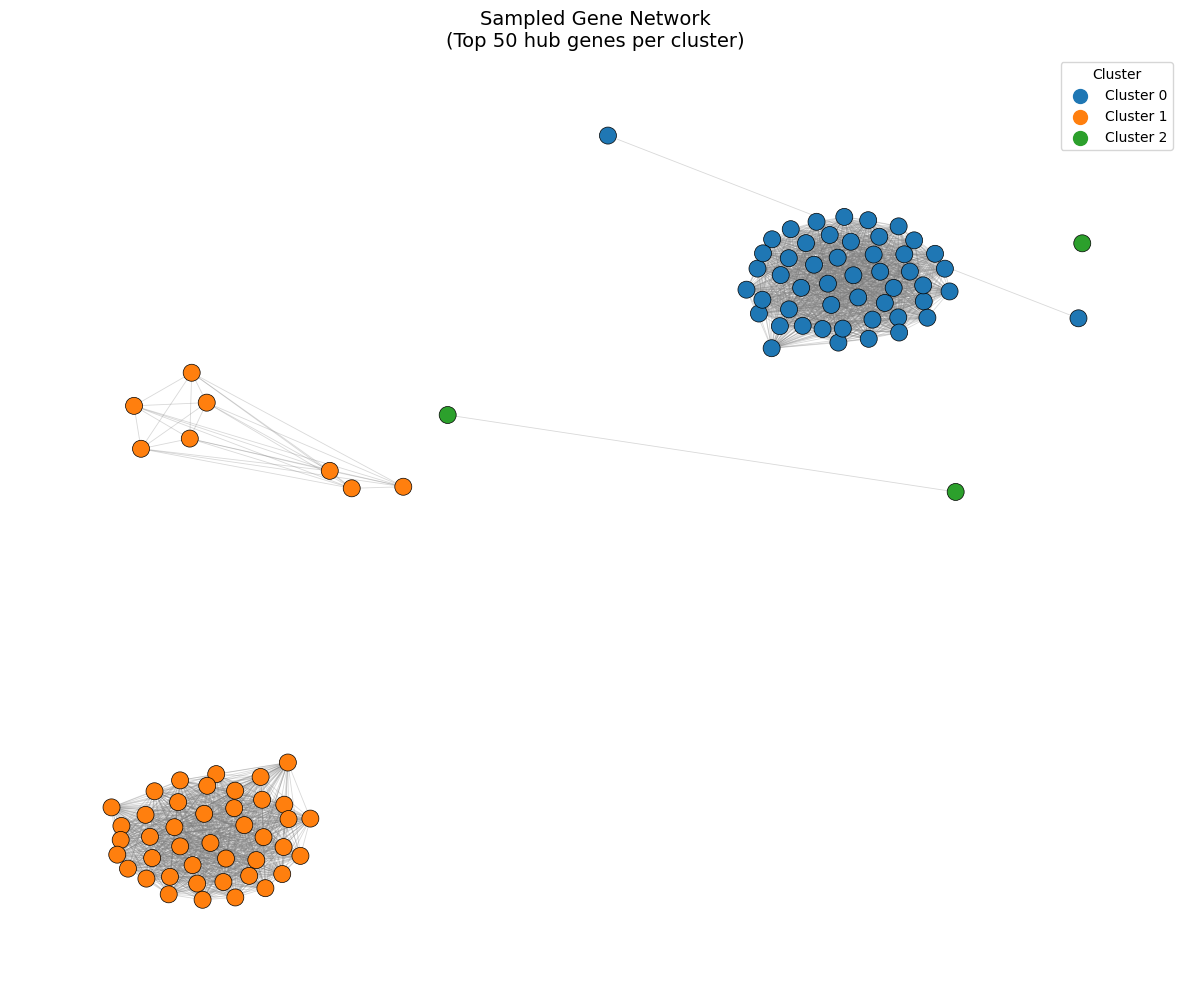

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


N_GENES_PER_CLUSTER = 50
selected_genes = []


unique_clusters_in_data = sorted(df_subset["cluster"].unique())

for c in unique_clusters_in_data:
    nodes_c = [n for n in G_full.nodes() if G_full.nodes[n]["cluster"] == c]

    degrees = {n: G_full.degree(n) for n in nodes_c}

    top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:N_GENES_PER_CLUSTER]
    selected_genes.extend(top_nodes)

G_small = G_full.subgraph(selected_genes).copy()

print(f"Nodi nel grafo ridotto: {G_small.number_of_nodes()}")
print(f"Archi nel grafo ridotto: {G_small.number_of_edges()}")


cluster_palette = {
    0: "#1f77b4",
    1: "#ff7f0e",
    2: "#2ca02c",
    3: "#d62728",
    4: "#9467bd"
}

clusters = nx.get_node_attributes(G_small, "cluster")
unique_clusters = sorted(list(set(clusters.values())))

node_colors = [cluster_palette[clusters[node]] for node in G_small.nodes()]

plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G_small, seed=42, k=0.5)

nx.draw_networkx_edges(
    G_small, pos,
    alpha=0.3,
    width=0.6,
    edge_color='gray'
)

nx.draw_networkx_nodes(
    G_small, pos,
    node_color=node_colors,
    node_size=150,
    edgecolors="black",
    linewidths=0.5
)

for c in unique_clusters:
    plt.scatter([], [], color=cluster_palette[c], label=f"Cluster {c}", s=100)

plt.legend(scatterpoints=1, frameon=True, title="Cluster", loc="upper right")
plt.title(f"Sampled Gene Network\n(Top {N_GENES_PER_CLUSTER} hub genes per cluster)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd


best_k = 3

print(f"Esecuzione K-Means con k={best_k}...")

kmeans = KMeans(
    n_clusters=best_k,
    random_state=42,
    n_init=10
)


kmeans_labels = kmeans.fit_predict(Z_scaled)


Z_clean = Z_scaled_df.copy()


Z_clean["kmeans_cluster"] = kmeans_labels


Z_clean["cluster"] = kmeans_labels


print("\n--- Risultati Clustering ---")
unique, counts = np.unique(kmeans_labels, return_counts=True)

for c, n in zip(unique, counts):
    print(f"K-Means cluster {c}: {n} geni trovati")

Z_clean.head()

Esecuzione K-Means con k=3...

--- Risultati Clustering ---
K-Means cluster 0: 4570 geni trovati
K-Means cluster 1: 29 geni trovati
K-Means cluster 2: 584 geni trovati


Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
10 -1.167742 -0.195179 -0.500654 -0.654570 -0.812740 -0.237030 -0.065600   
16  1.349100  1.292994  1.302222  2.591386  0.024552  0.299685  0.021864   
18 -0.081980  0.523096 -0.536776  1.160703  0.155524 -0.585673 -0.080557   
19 -0.488111  0.204421  1.144122  0.411474  0.999080  0.053459 -0.097278   
20 -0.181238  0.395195 -0.739258  0.558990  0.688555 -0.200594 -0.103859   

     Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  \
10  0.425406 -0.125581 -0.486207  0.258761  0.251934 -0.618392  0.163288   
16  0.096268 -0.500984  0.518629 -4.650380  0.110923  1.470237 -0.120048   
18  0.249551 -0.349475 -0.426473  0.098449  0.323453 -0.216793 -0.175941   
19  1.169830 -0.020196  1.118058  0.268633  0.917193  0.789597  1.390823   
20  0.673763 -0.413814 -0.568202 -0.214278  0.382881  0.513418  0.490693   

    Factor15  kmeans_cluster  cluster  
10 -0.225033               0        0  
16 -0.660778               0        0  
18 -0.668426               0        0  
19 -0.318268               0        0  
20 -0.011033               0        0

In [ ]:
!pip install umap-learn

Calcolo della proiezione UMAP (da 15 dimensioni a 2)...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP calcolato. Dimensioni: (5183, 3)


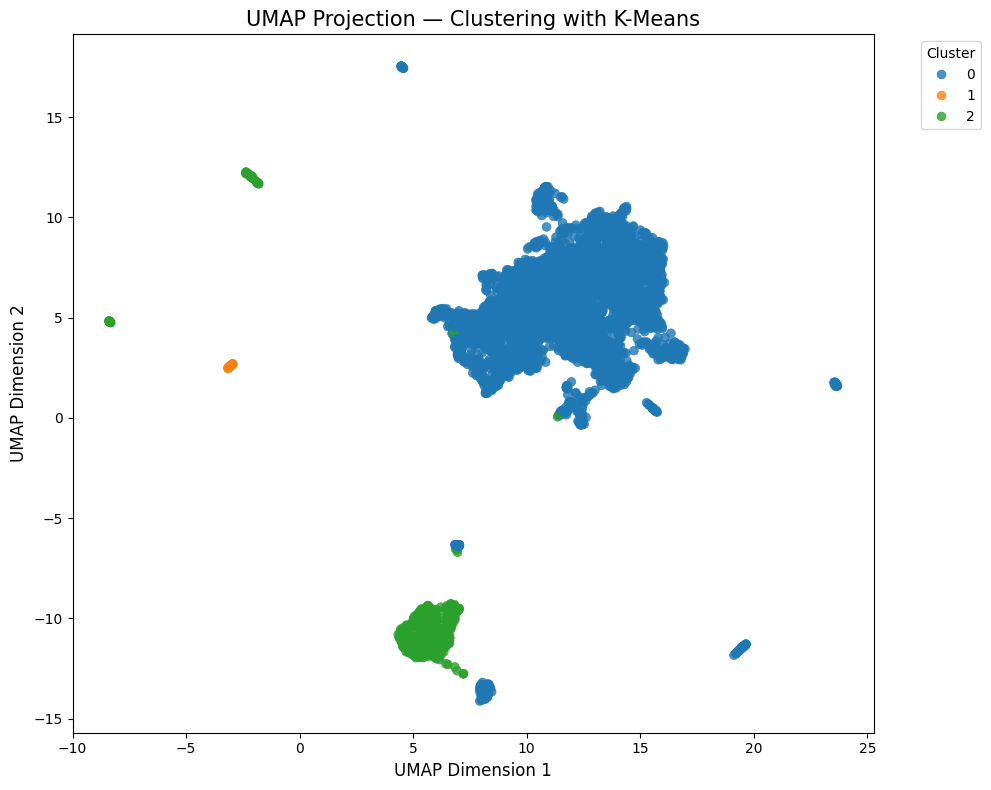

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


print("Calcolo della proiezione UMAP (da 15 dimensioni a 2)...")

reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.3,
    n_components=2,
    random_state=42
)

umap_embedding = reducer.fit_transform(Z_scaled)

UMAP_df = pd.DataFrame(
    umap_embedding,
    columns=["UMAP1", "UMAP2"],
    index=Z_clean.index
)

UMAP_df["kmeans_cluster"] = Z_clean["kmeans_cluster"]

print(f"UMAP calcolato. Dimensioni: {UMAP_df.shape}")


plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=UMAP_df,
    x="UMAP1", y="UMAP2",
    hue="kmeans_cluster",
    palette="tab10",
    s=40,
    alpha=0.8,
    edgecolor=None
)

plt.title("UMAP Projection — Clustering with K-Means", fontsize=15)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Dataset grande (5183 geni). Campiono 1000 geni per la heatmap...
Calcolo matrice di similarità...


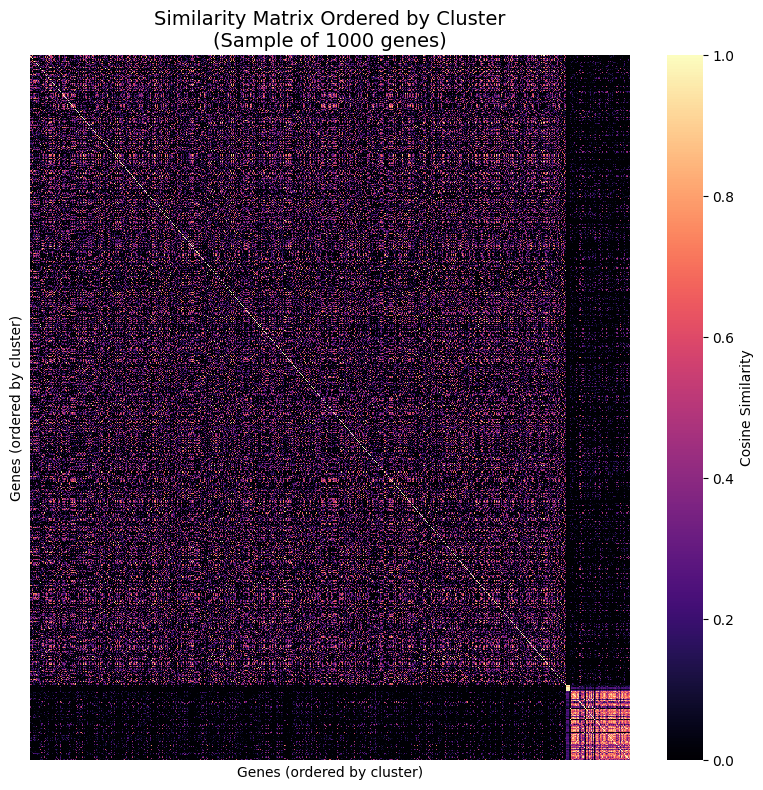

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


MAX_GENES = 1000

if len(Z_clean) > MAX_GENES:
    print(f"Dataset grande ({len(Z_clean)} geni). Campiono {MAX_GENES} geni per la heatmap...")
    df_heatmap = Z_clean.sample(n=MAX_GENES, random_state=42)
else:
    df_heatmap = Z_clean.copy()


print("Calcolo matrice di similarità...")

cols_exclude = ['cluster', 'kmeans_cluster']
data_matrix = df_heatmap.drop(columns=cols_exclude, errors='ignore')

sim_matrix = cosine_similarity(data_matrix)
sim_df = pd.DataFrame(sim_matrix, index=df_heatmap.index, columns=df_heatmap.index)


order_k = np.argsort(df_heatmap["kmeans_cluster"].values)
genes_ordered = df_heatmap.index[order_k]

sim_ordered = sim_df.loc[genes_ordered, genes_ordered]

plt.figure(figsize=(8, 8))

sns.heatmap(
    sim_ordered,
    cmap="magma",
    vmin=0, vmax=1,
    xticklabels=False,
    yticklabels=False,
    cbar_kws={'label': 'Cosine Similarity'}
)

plt.title(f"Similarity Matrix Ordered by Cluster\n(Sample of {len(df_heatmap)} genes)", fontsize=14)
plt.xlabel("Genes (ordered by cluster)")
plt.ylabel("Genes (ordered by cluster)")

plt.tight_layout()
plt.show()

Prime 5 righe del confronto:


cluster  kmeans_cluster
10        0               0
16        0               0
18        0               0
19        0               0
20        0               0


Tabella incrociata (Conteggi):
kmeans_cluster     0   1    2
cluster                      
0               4570   0    0
1                  0  29    0
2                  0   0  584


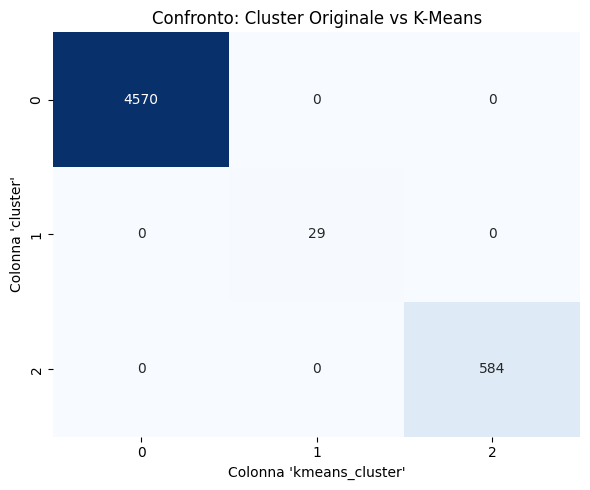

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


comparison_df = Z_clean[["cluster", "kmeans_cluster"]].copy()

print("Prime 5 righe del confronto:")
try:
    display(comparison_df.head())
except:
    print(comparison_df.head())


cross_tab = pd.crosstab(
    comparison_df["cluster"],
    comparison_df["kmeans_cluster"]
)

print("\nTabella incrociata (Conteggi):")
print(cross_tab)


plt.figure(figsize=(6, 5))

sns.heatmap(
    cross_tab,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False
)

plt.title("Confronto: Cluster Originale vs K-Means")
plt.ylabel("Colonna 'cluster'")
plt.xlabel("Colonna 'kmeans_cluster'")
plt.tight_layout()
plt.show()

Esecuzione Spectral Clustering...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



--- Confronto: K-Means vs Spectral Clustering ---
K-Means      0   1    2
Spectral               
0         4570   0  566
1            0  29    0
2            0   0   18


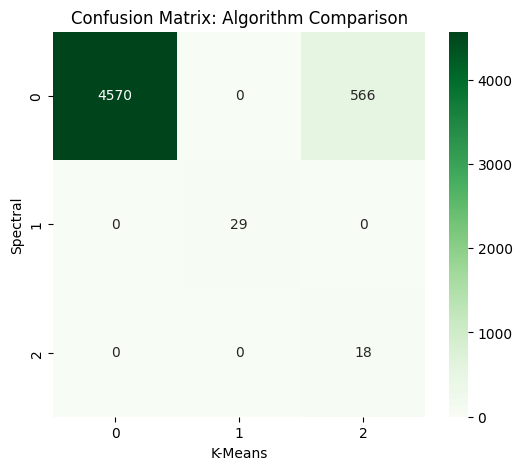

In [ ]:
import pandas as pd
from sklearn.cluster import SpectralClustering


print("Esecuzione Spectral Clustering...")

spectral = SpectralClustering(
    n_clusters=3,
    affinity='nearest_neighbors',
    random_state=42,
    n_jobs=-1
)

spectral_labels = spectral.fit_predict(Z_scaled)

comparison_df["spectral_cluster"] = spectral_labels

print("\n--- Confronto: K-Means vs Spectral Clustering ---")

ct = pd.crosstab(
    comparison_df["spectral_cluster"],
    comparison_df["kmeans_cluster"],
    rownames=["Spectral"],
    colnames=["K-Means"]
)

print(ct)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Algorithm Comparison")
plt.show()

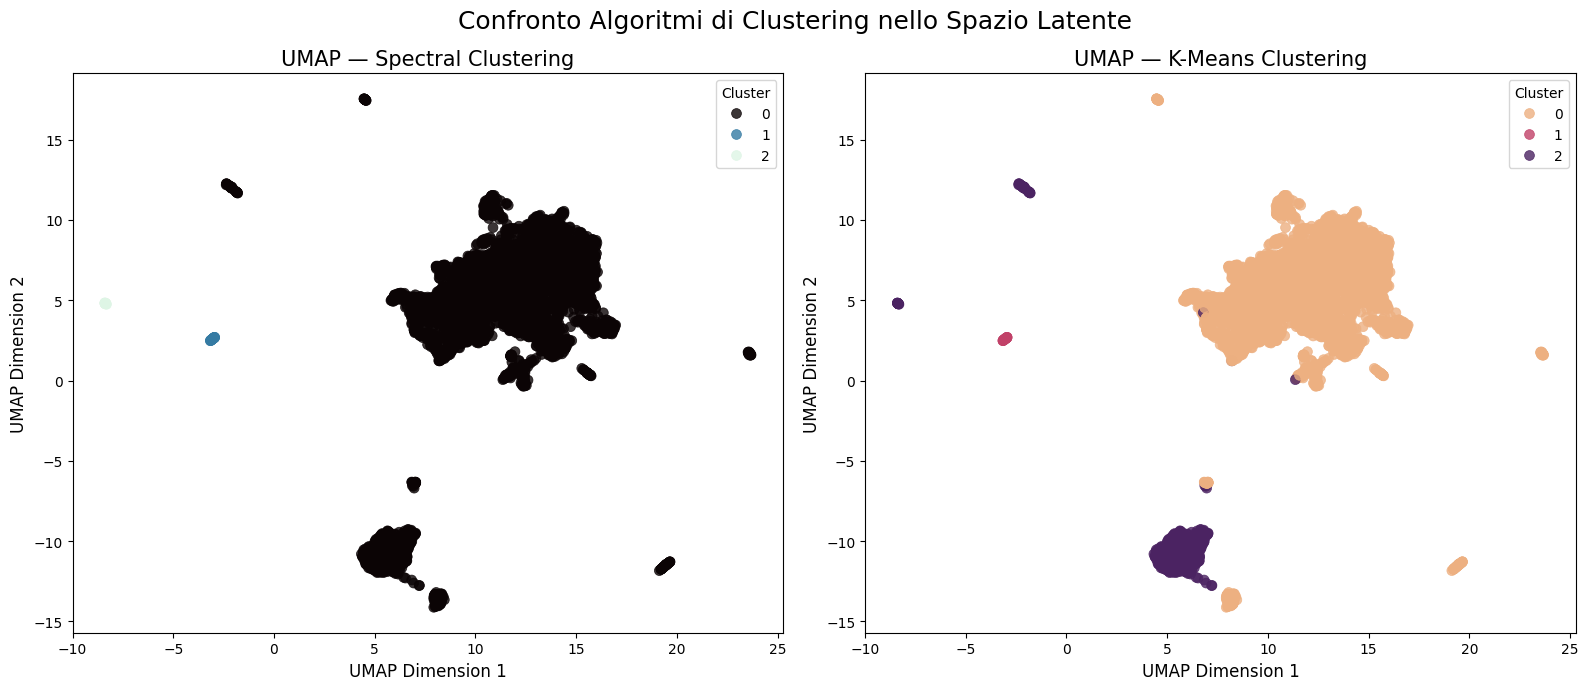

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


if "spectral_cluster" in comparison_df.columns:
    UMAP_df["spectral_cluster"] = comparison_df["spectral_cluster"]
else:

    print("⚠️ Attenzione: Spectral Clustering non trovato. Uso i dati K-Means per entrambi.")
    UMAP_df["spectral_cluster"] = UMAP_df["kmeans_cluster"]


fig, axes = plt.subplots(1, 2, figsize=(16, 7))


sns.scatterplot(
    ax=axes[0],
    data=UMAP_df,
    x="UMAP1", y="UMAP2",
    hue="spectral_cluster",
    palette="mako",
    s=50,
    alpha=0.8,
    edgecolor=None
)
axes[0].set_title("UMAP — Spectral Clustering", fontsize=15)
axes[0].legend(title="Cluster", loc='upper right')
axes[0].set_ylabel("UMAP Dimension 2", fontsize=12)
axes[0].set_xlabel("UMAP Dimension 1", fontsize=12)


sns.scatterplot(
    ax=axes[1],
    data=UMAP_df,
    x="UMAP1", y="UMAP2",
    hue="kmeans_cluster",
    palette="flare",
    s=50,
    alpha=0.8,
    edgecolor=None
)
axes[1].set_title("UMAP — K-Means Clustering", fontsize=15)
axes[1].legend(title="Cluster", loc='upper right')
axes[1].set_ylabel("UMAP Dimension 2", fontsize=12)
axes[1].set_xlabel("UMAP Dimension 1", fontsize=12)


plt.suptitle("Confronto Algoritmi di Clustering nello Spazio Latente", fontsize=18)
plt.tight_layout()
plt.show()

Addestramento Logistic Regression...

✅ Accuratezza del modello: 100.00%
(Se è > 95%, significa che i cluster sono ben separati matematicamente)

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4570
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00       584

    accuracy                           1.00      5183
   macro avg       1.00      1.00      1.00      5183
weighted avg       1.00      1.00      1.00      5183



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


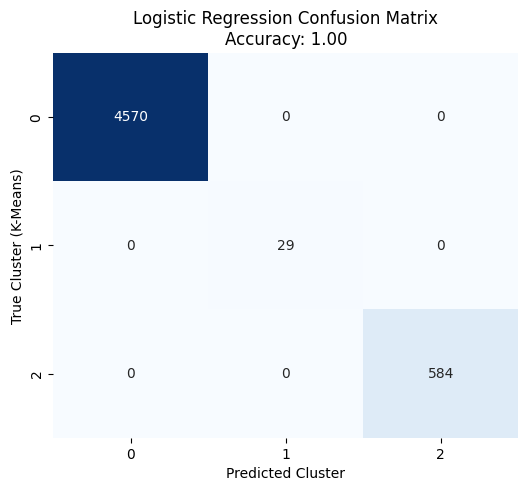

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X = Z_scaled
y = Z_clean["kmeans_cluster"].values



print("Addestramento Logistic Regression...")

log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

log_reg.fit(X, y)

pred = log_reg.predict(X)
acc = accuracy_score(y, pred)

print(f"\n✅ Accuratezza del modello: {acc*100:.2f}%")
print("(Se è > 95%, significa che i cluster sono ben separati matematicamente)\n")

print("--- Classification Report ---")
print(classification_report(y, pred))

cm = confusion_matrix(y, pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False
)
plt.title(f"Logistic Regression Confusion Matrix\nAccuracy: {acc:.2f}")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Cluster (K-Means)")
plt.show()

Tabella dei coefficienti (Numeri):


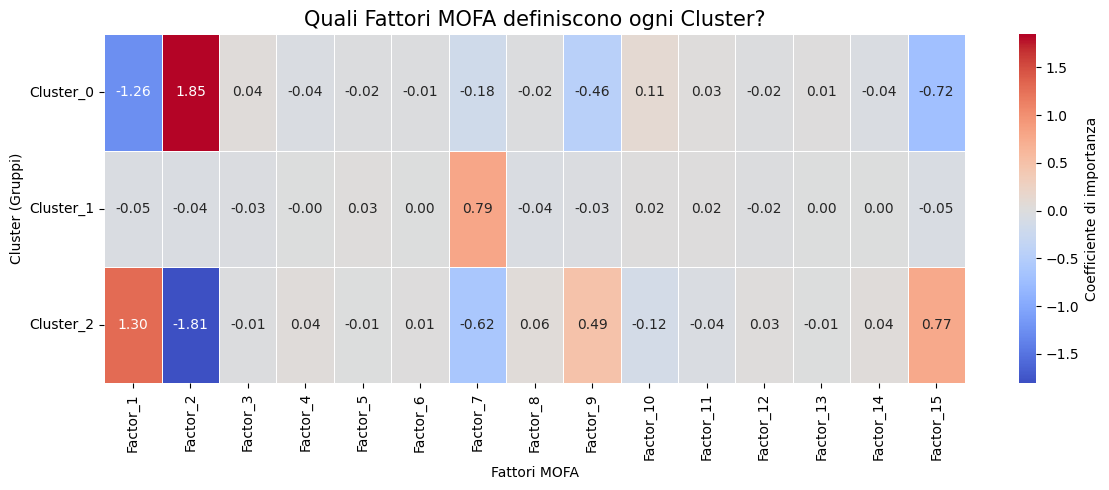

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


coeffs = pd.DataFrame(
    log_reg.coef_,
    columns=[f"Factor_{i+1}" for i in range(X.shape[1])],
    index=[f"Cluster_{c}" for c in sorted(np.unique(y))]
)

print("Tabella dei coefficienti (Numeri):")


plt.figure(figsize=(12, 5))

sns.heatmap(
    coeffs,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Coefficiente di importanza'}
)

plt.title("Quali Fattori MOFA definiscono ogni Cluster?", fontsize=15)
plt.xlabel("Fattori MOFA")
plt.ylabel("Cluster (Gruppi)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

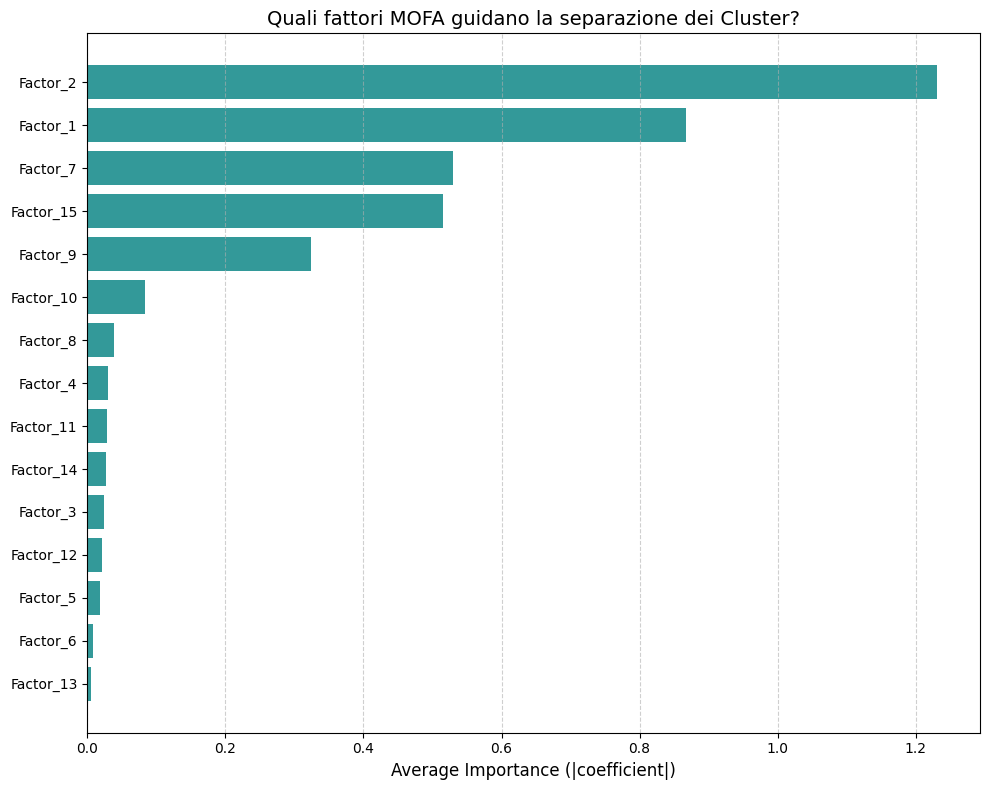

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


importance = coeffs.abs().mean(axis=0)

importance_sorted = importance.sort_values(ascending=True)


plt.figure(figsize=(10, 8))

plt.barh(importance_sorted.index, importance_sorted.values, color='teal', alpha=0.8)

plt.xlabel("Average Importance (|coefficient|)", fontsize=12)
plt.title("Quali fattori MOFA guidano la separazione dei Cluster?", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

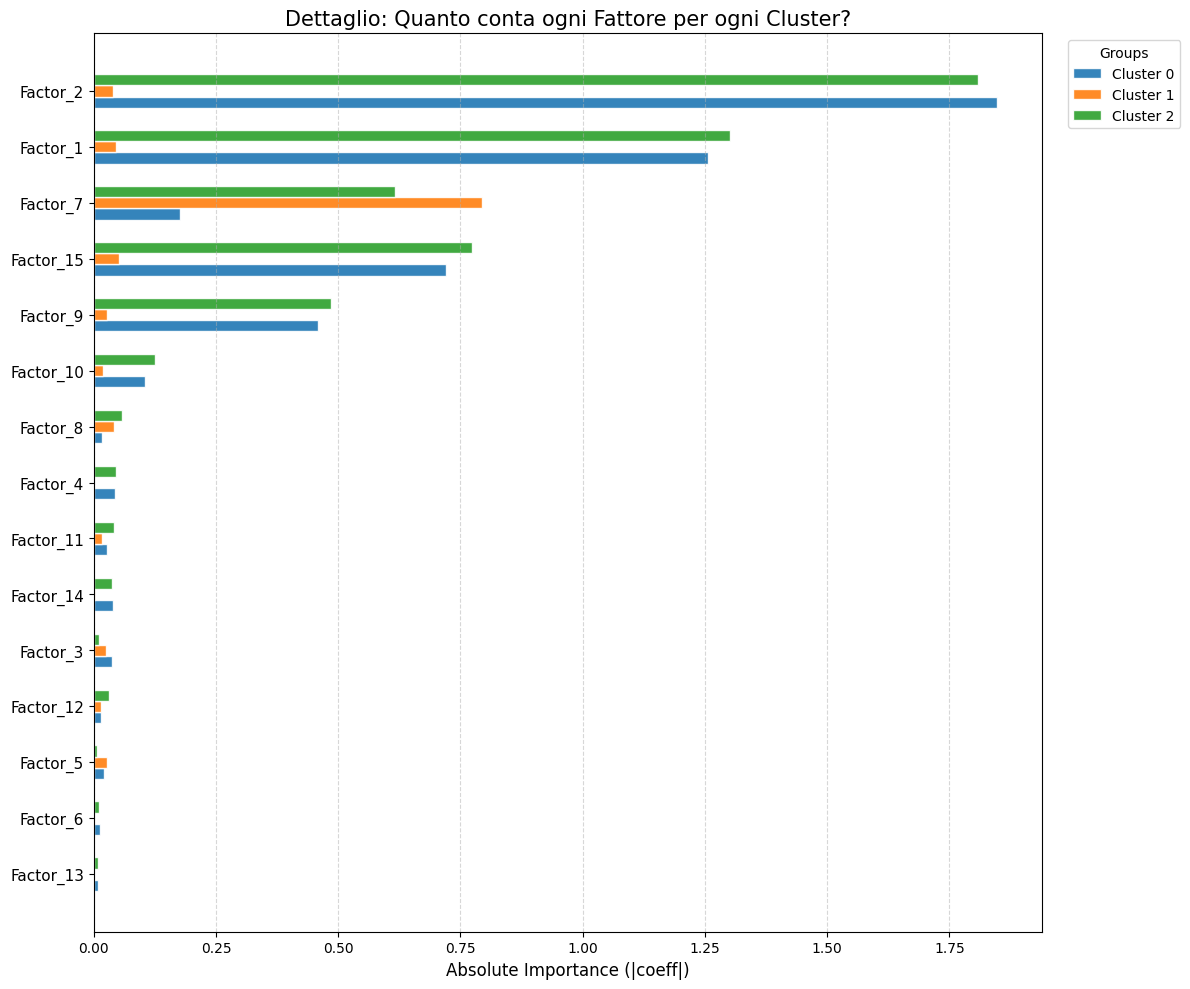

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


importance = coeffs.abs().mean(axis=0)
order = importance.sort_values(ascending=True).index

coeffs_sorted = coeffs[order].abs()


bar_height = 0.25
n_clusters = len(coeffs_sorted.index)
factor_spacing = bar_height * n_clusters + 0.5

base_y = np.arange(len(order)) * factor_spacing

plt.figure(figsize=(12, 10))

colors = sns.color_palette("tab10", n_clusters)

for i, cluster_name in enumerate(coeffs_sorted.index):
    y_pos = base_y + (i * bar_height)

    values = coeffs_sorted.loc[cluster_name]

    plt.barh(
        y=y_pos,
        width=values,
        height=bar_height,
        label=cluster_name.replace("Cluster_", "Cluster "), # Pulisce il nome
        color=colors[i],
        alpha=0.9,
        edgecolor='white'
    )


center_offset = ((n_clusters - 1) * bar_height) / 2
plt.yticks(base_y + center_offset, order, fontsize=11)

plt.xlabel("Absolute Importance (|coeff|)", fontsize=12)
plt.title("Dettaglio: Quanto conta ogni Fattore per ogni Cluster?", fontsize=15)
plt.legend(title="Groups", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

🏆 I 3 Fattori più determinanti sono: ['Factor_2', 'Factor_1', 'Factor_7']
Generazione grafici...

--- ANALISI DEL Factor_2 ---


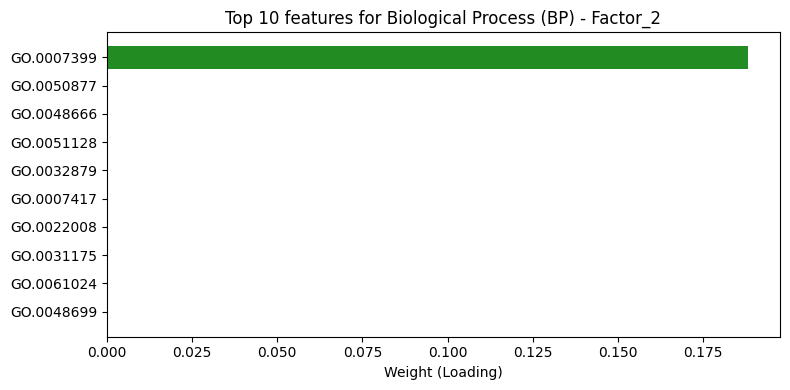

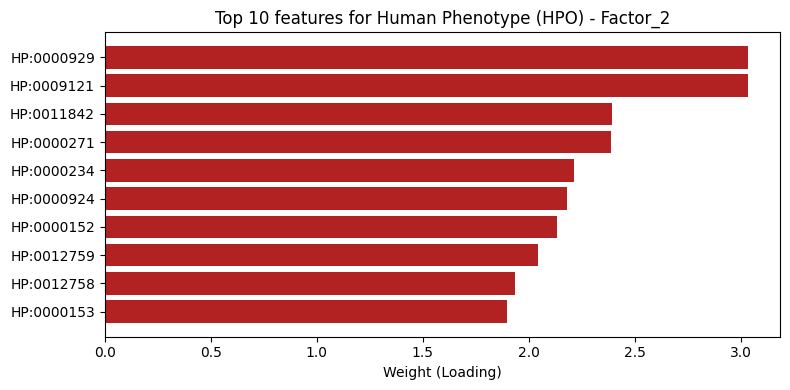



--- ANALISI DEL Factor_1 ---


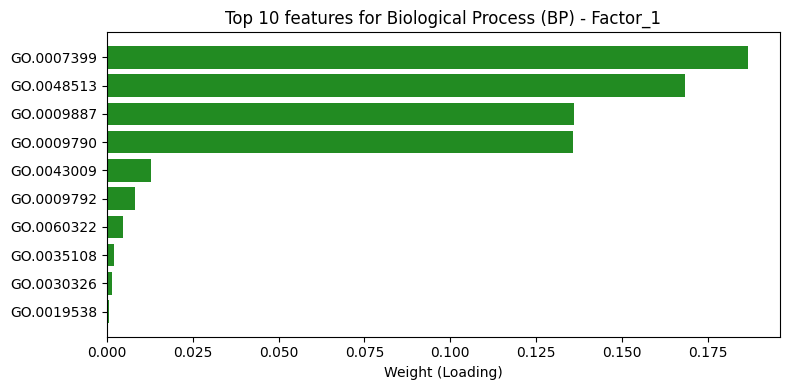

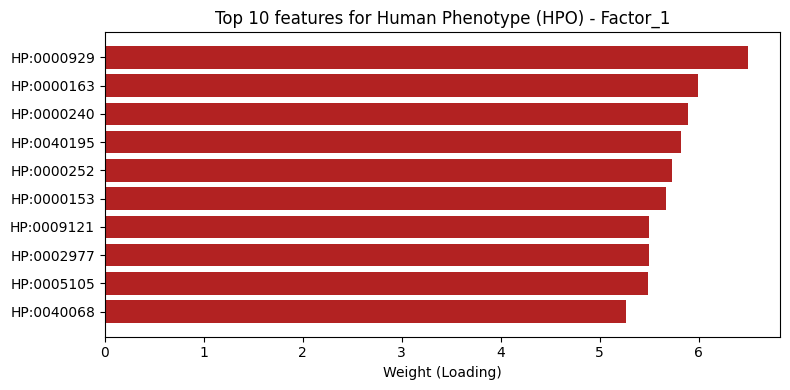



--- ANALISI DEL Factor_7 ---


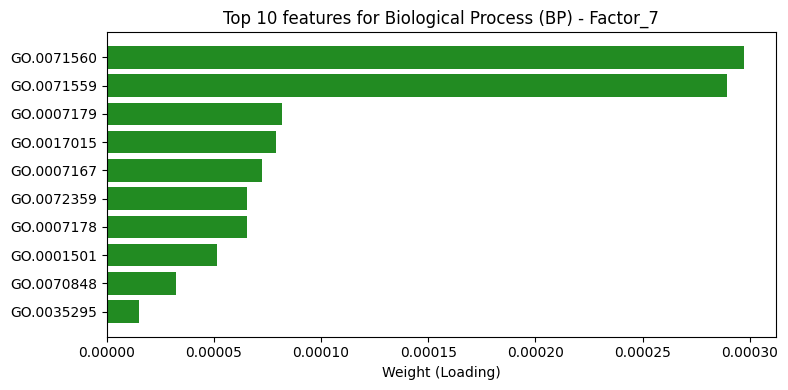

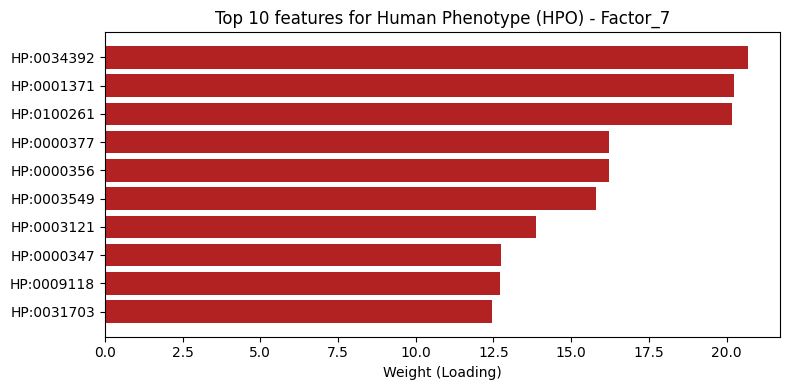

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


importance = coeffs.abs().mean(axis=0)

top3_factors = importance.sort_values(ascending=False).index[:3].tolist()

print(f"🏆 I 3 Fattori più determinanti sono: {top3_factors}")
print("Generazione grafici...\n")

try:
    weights_bp = pd.read_csv("MOFA_weights_BP.csv", index_col=0)
    weights_hpo = pd.read_csv("MOFA_weights_HPO.csv", index_col=0)


    new_columns = [f"Factor_{i+1}" for i in range(weights_bp.shape[1])]
    weights_bp.columns = new_columns
    weights_hpo.columns = new_columns

    def quick_plot_weights(df_weights, factor_name, view_title, color_pos):
        if factor_name not in df_weights.columns:
            print(f"⚠️ Salto {factor_name}: non trovato nel file CSV.")
            return

        top_genes = df_weights.sort_values(by=factor_name, ascending=False).head(10)

        plt.figure(figsize=(8, 4))
        plt.barh(top_genes.index, top_genes[factor_name], color=color_pos)
        plt.title(f"Top 10 features for {view_title} - {factor_name}")
        plt.xlabel("Weight (Loading)")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    for factor in top3_factors:
        print(f"--- ANALISI DEL {factor} ---")

        quick_plot_weights(weights_bp, factor, "Biological Process (BP)", "forestgreen")

        quick_plot_weights(weights_hpo, factor, "Human Phenotype (HPO)", "firebrick")

        print("\n" + "="*50 + "\n")

except FileNotFoundError:
    print("❌ ERRORE: Non trovo i file CSV dei pesi. Assicurati di averli caricati a sinistra.")
except Exception as e:
    print(f"❌ ERRORE IMPREVISTO: {e}")

Controllo nomi colonne...
Cercavo: ['Factor_2', 'Factor_1', 'Factor_7']
Ho trovato: ['Factor1', 'Factor2', 'Factor3']
✅ Colonne rinominate! Ora sono: ['Factor_1', 'Factor_2', 'Factor_3']


/tmp/ipython-input-2714874250.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2714874250.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2714874250.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


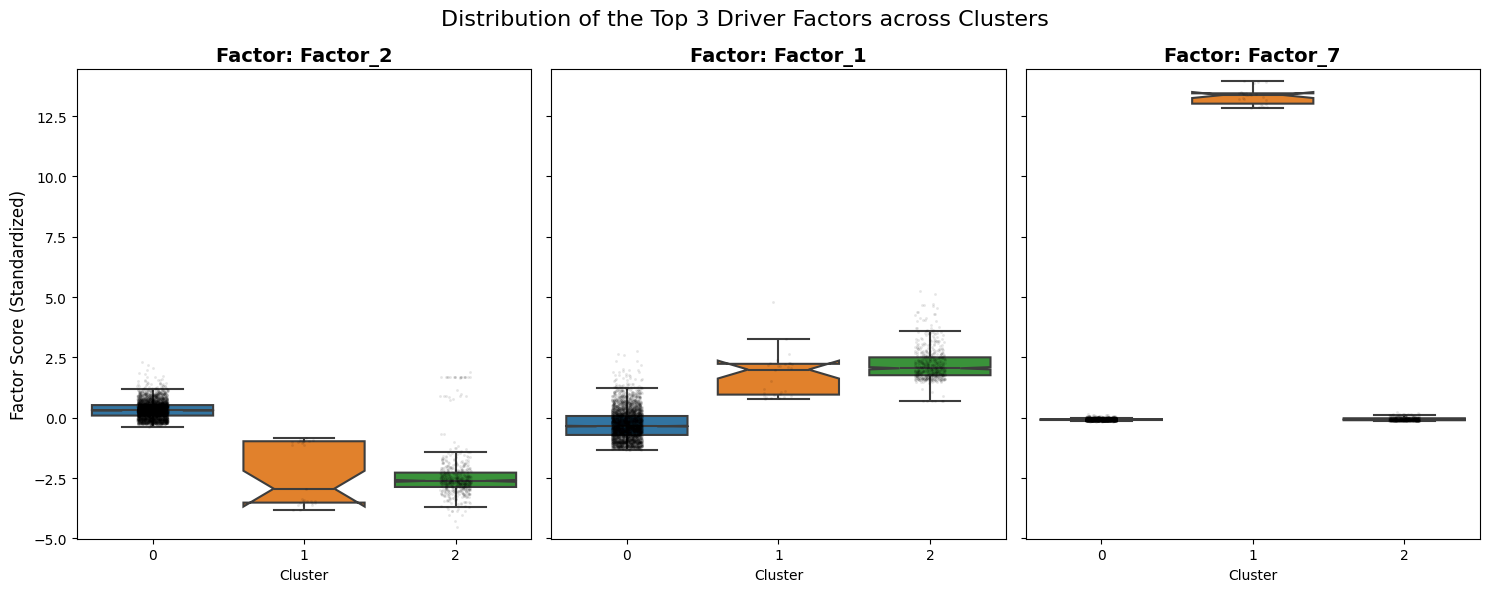

In [ ]:

print("Controllo nomi colonne...")
print(f"Cercavo: {top3}")
print(f"Ho trovato: {df_box.columns[:3].tolist()}")


rename_map = {}
for col in df_box.columns:
    if col.startswith("Factor") and "_" not in col:
        new_name = col.replace("Factor", "Factor_")
        rename_map[col] = new_name

df_box.rename(columns=rename_map, inplace=True)

print(f"✅ Colonne rinominate! Ora sono: {df_box.columns[:3].tolist()}")


import seaborn as sns
import matplotlib.pyplot as plt

global_ymin = df_box[top3].min().min() - 0.5
global_ymax = df_box[top3].max().max() + 0.5

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

for i, factor in enumerate(top3):
    ax = axes[i]

    sns.boxplot(
        data=df_box,
        x="cluster",
        y=factor,
        palette=cluster_palette,
        ax=ax,
        notch=True,
        linewidth=1.5,
        fliersize=0
    )

    sns.stripplot(
        data=df_box,
        x="cluster",
        y=factor,
        color="black",
        alpha=0.1,
        size=2,
        jitter=True,
        ax=ax
    )

    ax.set_ylim(global_ymin, global_ymax)
    ax.set_title(f"Factor: {factor}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Cluster")

    if i == 0:
        ax.set_ylabel("Factor Score (Standardized)", fontsize=12)
    else:
        ax.set_ylabel("")

plt.suptitle(f"Distribution of the Top 3 Driver Factors across Clusters", fontsize=16)
plt.tight_layout()
plt.show()